In [ ]:
import pandas as pd
import numpy as np
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show, yticks,savefig
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import itertools

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
!pip install --user colour-science
!pip install rdkit-pypi

In [ ]:
!pip install colormath
!pip install colour
from colour import Color

# Histogram statistics

In [ ]:
electrochromics = pd.read_csv('/content/ml_electrochromics_database_plus_exp.csv')

In [ ]:
combined_smiles = electrochromics['smiles_A'].tolist() + electrochromics['smiles_B'].tolist() + electrochromics['smiles_C'].tolist()

In [ ]:
smiles_list = [x for x in combined_smiles if x != '0']

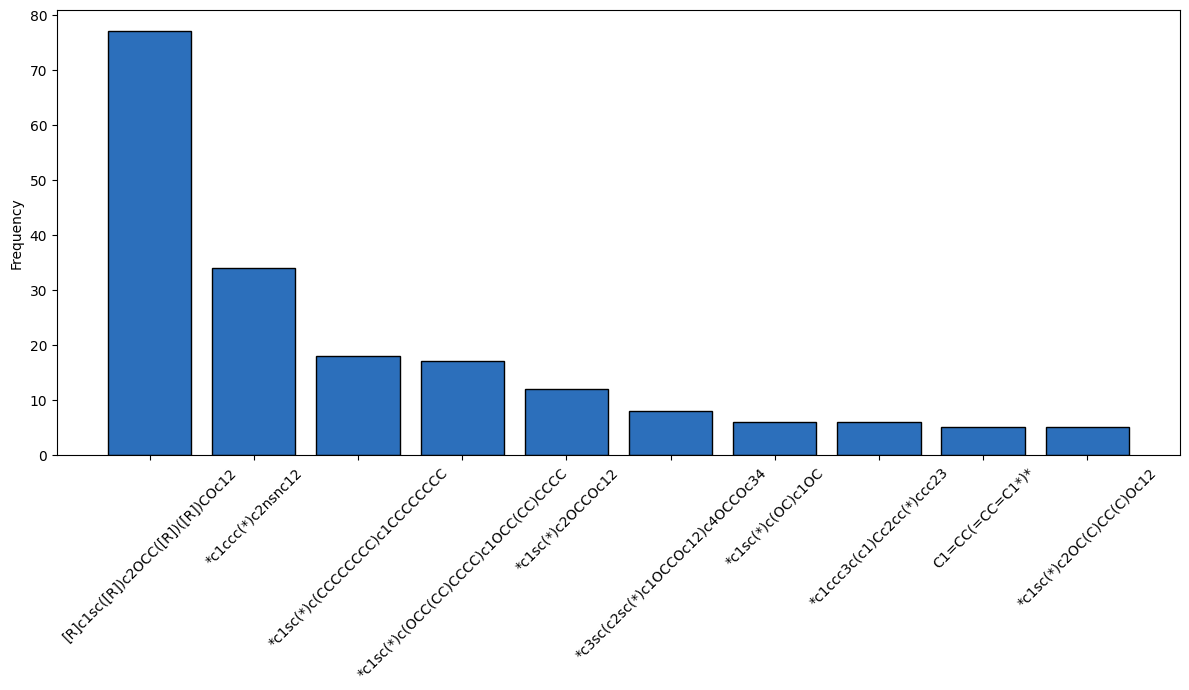

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# def plot_bar_from_smiles(smiles_list):
# Count frequencies of SMILES strings
counter = Counter(smiles_list)

# Extract unique SMILES and their counts
unique_smiles = list(counter.keys())
counts = list(counter.values())

# Order based on frequency and take top 5
ordered_pairs = sorted(zip(unique_smiles, counts), key=lambda x: x[1], reverse=True)[:10]
ordered_smiles = [x[0] for x in ordered_pairs]
ordered_counts = [x[1] for x in ordered_pairs]

fig, ax = plt.subplots(figsize=(12, 7))

# Plotting the bar chart
bars = ax.bar(ordered_smiles, ordered_counts, color='#2c6fbb', width=0.8, edgecolor='black')  # Adjust the width parameter if needed

# Set rotation for SMILES on x-axis
plt.xticks(rotation=45)

ax.set_ylabel('Frequency')
# ax.set_title('Top 5 SMILES by Frequency')

plt.tight_layout()
plt.savefig('test.svg')
plt.show()

# plot_bar_from_smiles(smiles_list)


In [ ]:
ordered_pairs

[('[R]c1sc([R])c2OCC([R])([R])COc12', 77),
 ('*c1ccc(*)c2nsnc12', 34),
 ('*c1sc(*)c(CCCCCCCC)c1CCCCCCCC', 18),
 ('*c1sc(*)c(OCC(CC)CCCC)c1OCC(CC)CCCC', 17),
 ('*c1sc(*)c2OCCOc12', 12),
 ('*c3sc(c2sc(*)c1OCCOc12)c4OCCOc34', 8),
 ('*c1sc(*)c(OC)c1OC', 6),
 ('*c1ccc3c(c1)Cc2cc(*)ccc23', 6),
 ('C1=CC(=CC=C1*)*', 5),
 ('*c1sc(*)c2OC(C)CC(C)Oc12', 5)]

In [ ]:
electrochromics.columns.values

array(['monomer_A ', 'smiles_A', 'Percentage of A %', 'monomer_B',
       'smiles_B', 'Percentage of B %', 'monomer_C', 'smiles_C',
       'Percentage of C %', 'ratios', 'num_monomers', 'Polymer Id',
       'chain_architecture', 'Synthetic Method', 'Molecular Weight (Mn)',
       'PDI', 'HOMO', 'LUMO', 'Bandgap (eV)', 'Reduction potential',
       'Oxidation Potential',
       'Wavelength at maximum absorption (λmax) (Solid State)',
       'Wavelength at maximum absorption (λmax) (Solution State)',
       'color', 'L* (Colored State)', 'a* (Colored State)',
       'b*(Colored State)', 'L * (Bleached State)', 'a* (Bleached State)',
       'b* (Bleached State)', 'film_thickness',
       'Maximum Optical Contrast', 'Citation', 'Link', 'Year'],
      dtype=object)

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
import colormath
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color
import plotly.express as px
from scipy.spatial import distance
# from colormap import rgb2hex
import plotly
import json
import time
import subprocess
import plotly.graph_objects as go
import os
import signal

def update_dataframe(new_data, dataframe):
    return dataframe.append(new_data, ignore_index=True)

def get_hex_color(L, a, b, df=None):
    color_list = []
    y_pred = list(zip(L, a,b))

    for i in range(len(y_pred)):
        lab_list = (list(y_pred[i]))
        a = ', '.join(str(item) for item in list(y_pred[i]))
        lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
        rgb = convert_color(lab, sRGBColor)
        rgb = colormath.color_objects.sRGBColor(rgb.clamped_rgb_r, rgb.clamped_rgb_g, rgb.clamped_rgb_b, is_upscaled=False)
        try:
            c = rgb.get_rgb_hex()
            color_list.append(str(c))
        except:
            color_list.append(0)
    try:
        df['color_shade'] = color_list
    except:
        pass
    return df, color_list

def get_color_selector(L_value):
    # Number of points
    num_points = 500

    # Generate random radii and angles
    radii = 128 * np.sqrt(np.random.rand(num_points))
    angles = 2 * np.pi * np.random.rand(num_points)
    # Create coordinates using the radii and angles
    a_values = radii * np.cos(angles)
    b_values = radii * np.sin(angles)

    # Create a DataFrame with the L, a and b values
    df = pd.DataFrame({
        'L* (Colored State)':np.repeat(L_value, num_points),
        'a* (Colored State)': a_values,
        'b*(Colored State)': b_values,
    })
    df_random , random_color_list = get_hex_color(df['L* (Colored State)'], df['a* (Colored State)'], df['b*(Colored State)'], df)
    df_random.to_csv('/home/rpl/workspace/polybot_workcell/polybot_app/demo_files/color_selection.csv', index=None)
    return df_random

def run_script():
    process = subprocess.Popen(["bash",'/home/rpl/workspace/polybot_workcell/scripts/run_batman_demo.sh'])
    # process =  subprocess.Popen(['nohup', '/home/rpl/workspace/polybot_workcell/scripts/run_batman_demo.sh', '&'])#, shell=True)
    with open('pid.txt', 'w') as f:
        f.write(str(process.pid))

def stop_script():
    with open('pid.txt', 'r') as f:
        pid = f.read().strip()
        if pid:
            os.kill(int(pid), signal.SIGTERM)
            st.write("Process stopped")
        else:
            st.write("No running process found")


# Slider to control the L value
L_value = electrochromics['L* (Colored State)']

# # Number of points
# num_points = 500
# # Generate random radii and angles
# radii = 128 * np.sqrt(np.random.rand(num_points))
# angles = 2 * np.pi * np.random.rand(num_points)
# # Create coordinates using the radii and angles
# a_values = radii * np.cos(angles)
# b_values = radii * np.sin(angles)
# # print(a_values)
# # Create a DataFrame with the L, a and b values
# df = pd.DataFrame({
#     'L* (Colored State)':np.repeat(L_value, num_points),
#     'a* (Colored State)': a_values,
#     'b*(Colored State)': b_values,
# })

#'L* (Colored State)', 'a* (Colored State)',
#        'b*(Colored State)',

# df_random = pd.read_csv('/home/rpl/workspace/polybot_workcell/polybot_app/demo_files/color_selection.csv')
# df_random['L* (Colored State)'] = np.repeat(L_value, df_random.shape[0])
df_random=electrochromics
df_random , random_color_list = get_hex_color(df_random['L* (Colored State)'], df_random['a* (Colored State)'], df_random['b*(Colored State)'], df_random)
fig = px.scatter(df_random , x='a* (Colored State)', y = 'b*(Colored State)', color='color_shade',
                  color_discrete_map='identity')
fig

In [ ]:
colors = random_color_list
r = df_random['a* (Colored State)']
theta =  df_random['b*(Colored State)']
theta = [theta[i] for i, c in enumerate(colors) if c != 0]
r = [r[i] for i, c in enumerate(colors) if c != 0]
colors = [c for c in colors if c != 0]


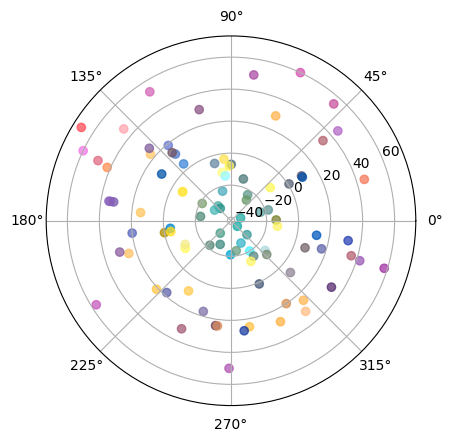

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150

# area = 200 * r**2

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, alpha=0.75)

In [ ]:
['*c1sc(*)c(OCC(CC)CCCC)c1OCC(CC)CCCC', '' ]  #[*]c1sc([*])c2OCC([*])([*])COc12

In [ ]:
smiles_to_replace = ['*c1sc(*)c2OCC(CCOCCCCCCCC)(CCOCCCCCCCC)COc12', '*c1sc(*)c2OCC(CCC(=O)OCCCCCCC)(CCC(=O)OCCCCCCC)COc12',
                     '*c1sc(*)c2OCCCOc12', '*c1sc(*)c2OCC(C)(C)COc12', '*c1sc(*)c2OCC(CC)(CC)COc12', '*c1sc(*)c2OCC(CC(C)C)(CC(C)C)COc12',
                     '*c1sc(*)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12', '*c1sc(*)c2OCC(CCOCC(CC)CCCC)(CCOCC(CC)CCCCC)COc12',
                     '*c1sc(*)c2OCC(COCC(CCCC)CCCCCCCCC)(COCC(CCCCCC)CCCCCCCCC)COc12', '*c1sc(*)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12']
replacement = '[R]c1sc([R])c2OCC([R])([R])COc12'

smiles_list = [replacement if smile in smiles_to_replace else smile for smile in smiles_list]


In [ ]:
ordered_smiles

['*c1sc(*)c2OCC(CCOCCCCCCCC)(CCOCCCCCCCC)COc12',
 '*c1sc(*)c2OCC(CCC(=O)OCCCCCCC)(CCC(=O)OCCCCCCC)COc12',
 '*c4ccc(c2ccc(c1ccc(*)s1)c3nsnc23)s4',
 '*c5sc(c3ccc(c2sc(*)c1OCCOc12)c4nsnc34)c6OCCOc56',
 '*c3ccc2c1ccc(*)cc1C(CCCCCCCC)(CCCCCCCC)c2c3',
 '*c3ccc2c1ccc(*)cc1n(CCCCCCCC)c2c3',
 'C1COc2cscc2OC1',
 '*c1[se]c(*)c2OCCOc12',
 '*c1sc(*)c2OCCCOc12',
 '*c1sc(*)c2O[C@H](C)CC(C)Oc12',
 '*c1sc(*)c2OCC(C)(C)COc12',
 '*c1sc(*)c2OCC(CC)(CC)COc12',
 '*c1sc(*)c2OCC(CC(C)C)(CC(C)C)COc12',
 '*c1cc2ccc3cc(*)cc4ccc(c1)c2c34',
 '*c1ccc(*)c2nc(C)c(C)nc12',
 '*c1sc(*)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12',
 '*c1ccc(*)s1',
 '*c1sc(*)c(OCCCCCCCC)c1OCCCCCCCC',
 '*c1sc(*)c(OCC(CC)CCCCCC)c1OCC(CC)CCCCCC',
 '*c1sc(*)c2OCC(CCOCC(CC)CCCC)(CCOCC(CC)CCCCC)COc12',
 '*c1sc(*)c2OC(C)CC(C)Oc12',
 'COc1cc([*])c(OC)cc1[*]',
 '*C5SC(c3ccc(C1SC(*)C2OCCOC12)c4nsnc34)C6OCCOC56',
 '*c1ccc3c(c1)Cc2cc(*)ccc23',
 '*c1sc(*)c2OCC(COCC(CCCC)CCCCCCCCC)(COCC(CCCCCC)CCCCCCCCC)COc12',
 '*c3sc(c2sc(*)c1OCCOc12)c4OCCOc34',
 '*c1sc(*)c(OC

In [ ]:
def smiles_to_img(smiles, img_size=(10, 10)):
    """Converts a SMILES string to an image."""
    mol = Chem.MolFromSmiles(smiles)
    print(mol)
    img = Draw.MolToImage(mol)#, size=img_size)


print(smiles_to_img('Cc3sc(c2sc(C)c1OCCOc12)c4OCCOc34', img_size=(10, 10)))

None


In [ ]:
def smiles_to_img(smiles):
  mol = Chem.MolFromSmiles(smiles) #'Cc3sc(c2sc(C)c1OCCOc12)c4OCCOc34')
  img = Draw.MolToImage(mol)#, size=img_size)
  print(img)

smiles_to_img('Cc3sc(c2sc(C)c1OCCOc12)c4OCCOc34')

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7CDE41B27D30>


In [ ]:
smiles_list

# ML for electrochromics

In [ ]:
database_data = electrochromics[electrochromics['monomer_A '] != 'A4']
experimental_points = electrochromics[electrochromics['monomer_A '] == 'A4']

In [ ]:
L=database_data['L* (Colored State)'].dropna().values
a_=database_data['a* (Colored State)'].dropna().values
b_=database_data['b*(Colored State)'].dropna().values

In [ ]:
exp_L = experimental_points['L* (Colored State)']#.dropna().values
exp_batches_a = experimental_points['a* (Colored State)']#.dropna().values
exp_batches_b = experimental_points['b*(Colored State)']#.dropna().values

In [ ]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

y_pred = list(zip(exp_L,exp_batches_a,exp_batches_b))
color_list_exp = []

for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)
  try:
    c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
    color_list_exp.append(str(c))
  except:
    pass

In [ ]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

y_pred = list(zip(L,a_,b_))
color_list = []

for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)
  try:
    c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
    color_list.append(str(c))
  except:
    pass

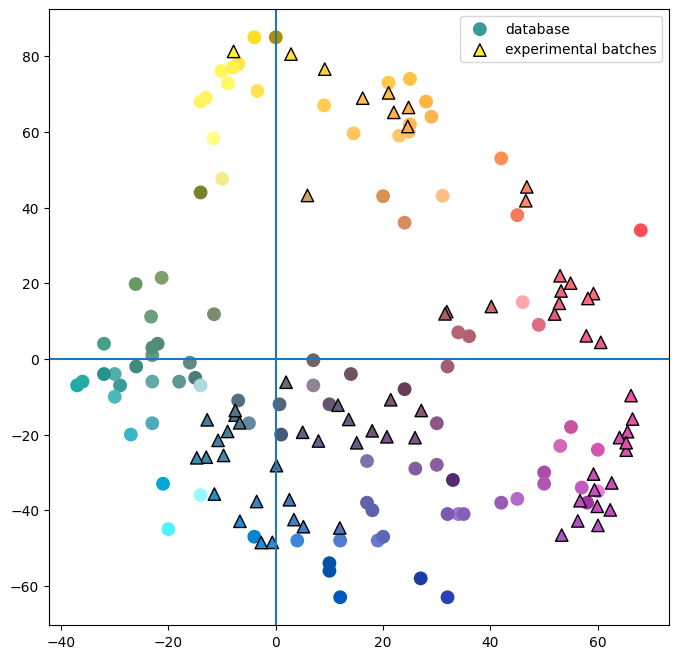

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x=0)
ax.axhline(y=0)
ax.scatter(a_,b_, c=color_list, s=80, label='database')
ax.scatter(exp_batches_a, exp_batches_b, c=color_list_exp, marker='^', edgecolors='black', s=80, label='experimental batches')
plt.legend()

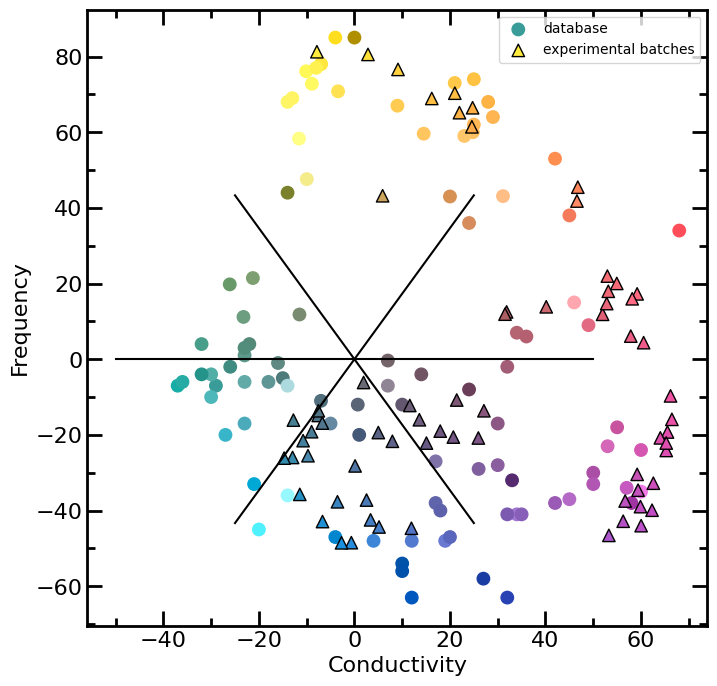

In [ ]:
from matplotlib import rc
import seaborn as sns
import matplotlib.font_manager
from scipy import stats
from matplotlib import rcParams


plt.rcParams['axes.facecolor'] = 'white'


plt.style.use('default')
import matplotlib.font_manager
rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
#rcParams['font.family'] = 'sans-serif'
#rcParams["font.sans-serif"] = "Helvetica"
rcParams["axes.labelsize"] = "medium"
rcParams["axes.labelweight"]= "normal"
rcParams["xtick.labelsize"] = "medium"
rcParams["ytick.labelsize"] = "medium"
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid']=False

fig, ax = plt.subplots(figsize=(8,8))
rcParams["axes.edgecolor"] = "0.15"
rcParams["axes.linewidth"]  = 1.25

plt.grid(False)

#plt.xlim(0, 1.0)
#plt.ylim(0, 1.0)
plt.xlabel('a* (Colored State)', fontsize=16)
plt.ylabel('b* (Colored State)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

major_ticks_x = np.arange(-80, 90, 20)
minor_ticks_x = np.arange(-80, 90, 10)
major_ticks_y = np.arange(-80, 90, 20)
minor_ticks_y = np.arange(-870, 90, 10)
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)



# Calculate line end points for lines starting from origin at given angles
def calculate_end_points(angle_degrees, length=50):
    angle_radians = np.radians(angle_degrees)
    x_end = length * np.cos(angle_radians)
    y_end = length * np.sin(angle_radians)
    return x_end, y_end

# List of angles for lines
angles = [60, 120, 180, 240, 300, 360]

# Add lines to scatter plot
for angle in angles:
    x_end, y_end = calculate_end_points(angle)
    ax.plot([0, x_end], [0, y_end], color='black')#, label=f'{angle} degrees')

#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.gca().set_aspect('equal', adjustable='box')

ax.scatter(a_,b_, c=color_list, s=80, label='database')
ax.scatter(exp_batches_a, exp_batches_b, c=color_list_exp, marker='^', edgecolors='black', s=80, label='experimental batches')

ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=11)
ax.tick_params(axis = 'both', which='minor', length=6, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction="in")
plt.legend()
plt.savefig('color_regions.svg')

# ML

In [ ]:
experimental = experimental_points # pd.read_csv('/content/external_validation.csv')#('/content/ml_electrochromics.csv')
print(experimental.shape)
# experimental = experimental[experimental.monomer_C=='0']
experimental.reset_index(inplace=True, drop=True)
experimental['smiles_A'] = experimental['smiles_A'].str.replace('*', 'C')
experimental['smiles_B'] = experimental['smiles_B'].str.replace('*', 'C')
#experimental['smiles_C'] = experimental['smiles_C'].str.replace('*', 'C')

experimental['Percentage of A %'] = experimental['Percentage of A %']/100
experimental['Percentage of B %'] = experimental['Percentage of B %']/100
experimental.shape

(68, 35)


<ipython-input-26-310af20ce23f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  experimental['smiles_A'] = experimental['smiles_A'].str.replace('*', 'C')
<ipython-input-26-310af20ce23f>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  experimental['smiles_B'] = experimental['smiles_B'].str.replace('*', 'C')


(68, 35)

In [ ]:
electrochromics = pd.read_csv('/content/ml_electrochromics_database_plus_exp.csv')#('/content/ml_electrochromics.csv')
electrochromics = electrochromics[electrochromics.monomer_B	!='GM1']
# electrochromics = electrochromics[electrochromics['monomer_A ']	!='A4']
electrochromics['smiles_A'] = electrochromics['smiles_A'].str.replace('*', 'C')
electrochromics['smiles_B'] = electrochromics['smiles_B'].str.replace('*', 'C')
electrochromics['smiles_C'] = electrochromics['smiles_C'].str.replace('*', 'C')

df=electrochromics#.fillna(0)#['color'] ['a* (Colored State)]
df = df[['smiles_A', 'Percentage of A %', 'smiles_B' , 'Percentage of B %', 'smiles_C', 'Percentage of C %', 'L* (Colored State)', 'a* (Colored State)', 'b*(Colored State)']] # 'Bandgap (eV)',
df['Percentage of A %'] = df['Percentage of A %']/100
df['Percentage of B %'] = df['Percentage of B %']/100
df['Percentage of C %'] = df['Percentage of C %']/100
df = df.dropna(axis=0)
df

<ipython-input-13-fccbd3d946ff>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  electrochromics['smiles_A'] = electrochromics['smiles_A'].str.replace('*', 'C')
<ipython-input-13-fccbd3d946ff>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  electrochromics['smiles_B'] = electrochromics['smiles_B'].str.replace('*', 'C')
<ipython-input-13-fccbd3d946ff>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  electrochromics['smiles_C'] = electrochromics['smiles_C'].str.replace('*', 'C')
<ipython-input-13-fccbd3d946ff>:10: Setting

,smiles_A,Percentage of A %,smiles_B,Percentage of B %,smiles_C,Percentage of C %,L* (Colored State),a* (Colored State),b*(Colored State)
0,Cc1sc(C)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12,0.67,Cc4ccc(c2ccc(c1ccc(C)s1)c3nsnc23)s4,0.33,0,0.0,59.000000,-29.000000,-7.000000
1,Cc1sc(C)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12,0.67,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0.33,0,0.0,66.000000,-30.000000,-4.000000
2,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.67,Cc1ccc(C)c2nsnc12,0.33,0,0.0,64.000000,-37.000000,-7.000000
3,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.80,Cc1ccc(C)c2nsnc12,0.20,0,0.0,57.000000,7.000000,-7.000000
4,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.86,Cc1ccc(C)c2nsnc12,0.14,0,0.0,52.000000,34.000000,7.000000
...,...,...,...,...,...,...,...,...,...
162,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.60,C1=CC(=CC=C1C)C,0.20,Cc1sc(C)c2OCCOc12,0.2,59.610230,60.543728,4.374281
163,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.60,Cc1sc(C)c(OC)c1OC,0.30,Cc1sc(C)c2OCCOc12,0.1,53.553753,59.374792,-34.610895
164,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.50,Cc1sc(C)c(OC)c1OC,0.20,Cc1sc(C)c2OCCOc12,0.3,51.672199,53.271125,-46.562860
165,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.50,Cc1sc(C)c(OC)c1OC,0.30,Cc1sc(C)c2OCCOc12,0.2,52.648164,56.676883,-37.478203


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
m = Chem.MolFromSmiles('*c1sc(*)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12')
fp = AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=2048)

In [ ]:
import ast
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_dft_descriptors_dictionary(dft_calculations_file):
    # create a dictionary to assign the molecular features to each of the smiles stings
    data_dft = pd.read_csv(dft_calculations_file)#'/content/dft_descriptors_all_transitions.csv')
    data_dft = data_dft.drop(['stoichiometry','number_of_atoms','charge','multiplicity', 'E_scf', 'zero_point_correction', 'E_thermal_correction',
        'H_thermal_correction', 'G_thermal_correction', 'E_zpe', 'E', 'H','converged',#'ES_<S**2>',
        'G', ], axis=1) #'number_of_atoms', 'molar_mass', 'molar_volume', 'dipole','electronic_spatial_extent','electronegativity',
    #num_list = [ast.literal_eval(s) for s in data_dft['ES_transition'].tolist()]
    #num_list1 = [ast.literal_eval(s) for s in data_dft['ES_osc_strength'].tolist()]

    # apply pd.Series to expand list in column to multiple columns
    #data_dft[['ES_transition_%s'%(i+1) for i in range(10)]] = pd.DataFrame(num_list).apply(pd.Series)
    #data_dft[['ES_osc_strength_%s'%(i+1) for i in range(10)]] = pd.DataFrame(num_list).apply(pd.Series)
    #data_dft.drop('ES_transition', axis=1, inplace=True)
    #data_dft.drop('ES_osc_strength', axis=1, inplace=True)
    scaler = MinMaxScaler()

    # scale the DataFrame
    # select columns to scale
    cols_to_scale = data_dft.columns[1:]

    # scale the selected columns
    data_dft[cols_to_scale] = scaler.fit_transform(data_dft[cols_to_scale])

    dictionary = data_dft.set_index('smiles').agg(list, axis=1).to_dict()
    return dictionary, data_dft.columns.values[1:]

In [ ]:
# create a dictionary to assign the molecular features to each of the smiles stings
dictionary , descriptor_names= get_dft_descriptors_dictionary('/content/dft_descriptors_ECPs.csv')

In [ ]:
def smile_to_dft(smile):
  return dictionary[smile]

def dft_descr(smiles):
  bits = []
  for smile in smiles:
    try:
      bits.append(np.asarray(smile_to_dft(smile)))
    except:
      bits.append(np.zeros(len(descriptor_names)))
  return bits

def dft_descr_from_df(smiles, prefix):
  df = pd.DataFrame(dft_descr(smiles))

  df.columns =[f'{prefix}_{i}' for i in descriptor_names] # descriptor_names
  return df

In [ ]:
df1_dft = dft_descr_from_df(df.smiles_A, 'A')
df2_dft  = dft_descr_from_df(df.smiles_B, 'B')
df3_dft  = dft_descr_from_df(df.smiles_C, 'C')

df1_test_dft  = dft_descr_from_df(experimental.smiles_A, 'A')
df2_test_dft  = dft_descr_from_df(experimental.smiles_B, 'B')
df3_test_dft  = dft_descr_from_df(experimental.smiles_C, 'C')

In [ ]:
from rdkit.Chem import rdFingerprintGenerator
def smile_to_bits(smile):
  mol = Chem.MolFromSmiles(smile)
  #return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True)
  #try:
  # fpgen1 = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=1024,countSimulation=True)
  # return fpgen1.GetCountFingerprintAsNumPy(mol)
  return AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
  #except:
   # pass
  #MHFPEncoder.secfp_from_smiles(smile, length=2048, radius=3, rings=True, kekulize=True, sanitize=False)
  #AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048, useChirality=True)
  #MHFPEncoder.secfp_from_smiles(smile, length=2048, radius=3, rings=True, kekulize=True, sanitize=False)
  #MACCSkeys.GenMACCSKeys(mol)
  #return AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024, useChirality=False)

def kat_paws(smiles):
  paws = []
  for smile in smiles:
    #print(smile)
    #try:
    paws.append(np.asarray(smile_to_bits(smile)))
    #except:
      #print(smile)
     # paws.append(np.zeros(1024))
  #print(paws)
  return paws

def kat_paws_from_df(smiles, prefix):
  df = pd.DataFrame(kat_paws(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [ ]:
from rdkit.Chem import rdFingerprintGenerator
def smile_to_bits(smile):
  mol = Chem.MolFromSmiles(smile)
  return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=False)

def get_vectors(smiles):
  paws = []
  for smile in smiles:
    try:
      paws.append(np.asarray(smile_to_bits(smile)))
    except:
      paws.append(np.zeros(1024))
  return paws

def bits_to_df(smiles, prefix):
  df = pd.DataFrame(get_vectors(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [ ]:
df1 = bits_to_df(df.smiles_A, 'bit_A')
df2 = bits_to_df(df.smiles_B, 'bit_B')
df3 = bits_to_df(df.smiles_C, 'bit_C')

df1_test = bits_to_df(experimental.smiles_A, 'bit_A')
df2_test = bits_to_df(experimental.smiles_B, 'bit_B')
df3_test = bits_to_df(experimental.smiles_C, 'bit_C')

[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:23] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[12:56:23] SMILES Parse Error: syntax error while parsing: 0
[12:56:2

In [ ]:
import joblib
#joblib.dump(scalery, 'scaler.gz')

In [ ]:
my_scaler = joblib.load('scaler.gz')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_L = MinMaxScaler()
scaler_a = MinMaxScaler()
scaler_b = MinMaxScaler()
#df['a* (Colored State)'] =  scaler_a.fit_transform(np.array(df['a* (Colored State)'].values.reshape(-1,1)))
#df['b*(Colored State)'] = scaler_b.fit_transform(np.array(df['b*(Colored State)'].values.reshape(-1,1)))
#df['L* (Colored State)'] = scaler_L.fit_transform(np.array(df['L* (Colored State)'].values.reshape(-1,1)))
df_y = df[['L* (Colored State)' ,'a* (Colored State)', 'b*(Colored State)']]#, 'Bandgap (eV)']]
#[float(i) for i in str(y_new[:,1]).replace('na', '0')]
scalery = MinMaxScaler().fit(df_y.values)
#scalery = my_scaler
df_y_scaled = scalery.transform(df_y)
#df_y_scaled
#df_y_inverse = scalery.inverse_transform(df_y_scaled)
#df_y_inverse

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
experimental_validation = experimental[['L* (Colored State)' ,'a* (Colored State)', 'b*(Colored State)']] #experimental[['L' ,'a', 'b']] #[['L* (Colored State)' ,'a* (Colored State)', 'b*(Colored State)']]#, 'Bandgap (eV)'
experimental_y_scaled = scalery.transform(experimental_validation.values)
experimental_y_scaled

array([[0.92931301, 0.27757226, 0.97473129],
       [0.79248753, 0.55253431, 0.90073272],
       [0.61178722, 0.79777249, 0.73286074],
       [0.53390255, 0.91606698, 0.54235773],
       [0.46161133, 0.98264824, 0.36018121],
       [0.44243082, 0.98537369, 0.31828456],
       [0.43764759, 0.84717772, 0.50583709],
       [0.47165153, 0.8554286 , 0.52500633],
       [0.48573751, 0.85856056, 0.54696677],
       [0.46400332, 0.90336727, 0.46690768],
       [0.51174944, 0.85673185, 0.57409815],
       [0.36059651, 0.38460132, 0.13875522],
       [0.3783209 , 0.31853207, 0.17105734],
       [0.38486987, 0.22903558, 0.25019596],
       [0.29495857, 0.28020825, 0.32521113],
       [0.24489629, 0.61057892, 0.33359944],
       [0.36607041, 0.94578314, 0.15604085],
       [0.37064967, 0.9240108 , 0.12838923],
       [0.37374715, 0.92271804, 0.16240966],
       [0.3869288 , 0.94840056, 0.20424988],
       [0.42189239, 0.97656909, 0.29567705],
       [0.20188839, 0.52343588, 0.29726439],
       [0.

In [ ]:
dataset1 = pd.concat([df1,pd.DataFrame(df[['Percentage of A %']].values, columns=['Percentage of A %']),df2,pd.DataFrame(df[['Percentage of B %']].values, columns=['Percentage of B %']),
                     df3, pd.DataFrame(df[['Percentage of C %']].values, columns=['Percentage of C %']) ], axis=1)

dataset2 = pd.concat([df2,pd.DataFrame(df[['Percentage of B %']].values, columns=['Percentage of A %']),df1,pd.DataFrame(df[['Percentage of A %']].values, columns=['Percentage of B %']),
                     df3, pd.DataFrame(df[['Percentage of C %']].values, columns=['Percentage of C %']) ], axis=1)

dataset = pd.concat([dataset1, dataset2])
dataset#.dropna(axis=0)#.shape #.head()

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_1015,bit_1016,bit_1017,bit_1018,bit_1019,bit_1020,bit_1021,bit_1022,bit_1023,Percentage of C %
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2


In [ ]:
dataset = pd.concat([df1,df1_dft,pd.DataFrame(df[['Percentage of A %']].values, columns=['Percentage of A %']),df2,df2_dft,pd.DataFrame(df[['Percentage of B %']].values, columns=['Percentage of B %']),
                     df3,df3_dft, pd.DataFrame(df[['Percentage of C %']].values, columns=['Percentage of C %']) ], axis=1) #
dataset#.dropna(axis=0)#.shape #.head()

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,1,0,0,0,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.2
161,0,1,0,0,0,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.1
162,0,1,0,0,0,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.3
163,0,1,0,0,0,0,0,0,0,0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.2


In [ ]:
dataset_test = pd.concat([df1_test,df1_test_dft,experimental[['Percentage of A %']],df2_test,df2_test_dft, experimental[['Percentage of B %']], df3_test,df3_test_dft, experimental[['Percentage of C %']]], axis=1) #
dataset_test

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
64,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
65,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
66,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [ ]:
dataset = pd.concat([df1,pd.DataFrame(df[['Percentage of A %']].values, columns=['Percentage of A %']),df2,pd.DataFrame(df[['Percentage of B %']].values, columns=['Percentage of B %']),
                     df3, pd.DataFrame(df[['Percentage of C %']].values, columns=['Percentage of C %']) ], axis=1) #
dataset#.dropna(axis=0)#.shape #.head()

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_1015,bit_1016,bit_1017,bit_1018,bit_1019,bit_1020,bit_1021,bit_1022,bit_1023,Percentage of C %
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
161,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
162,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
163,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2


In [ ]:
dataset_test = pd.concat([df1_test,experimental[['Percentage of A %']],df2_test, experimental[['Percentage of B %']], df3_test, experimental[['Percentage of C %']]], axis=1) #
dataset_test

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_1015,bit_1016,bit_1017,bit_1018,bit_1019,bit_1020,bit_1021,bit_1022,bit_1023,Percentage of C %
0,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
!git clone https://github.com/juho-lee/set_transformer.git

Cloning into 'set_transformer'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 46 (delta 12), reused 9 (delta 9), pack-reused 24
Receiving objects: 100% (46/46), 65.05 KiB | 3.61 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
%cd set_transformer

/content/set_transformer


In [ ]:
import torch
import torch.nn as nn
from modules import SAB, PMA, ISAB
import numpy as np

def combine(data1, data2):
    return np.array(list(zip(data1, data2)))

class MonomerPair(torch.utils.data.Dataset):
  def __init__(self, dataset1, dataset2, dataset3, y):
    self.x = np.array(list(zip(dataset1, dataset2, dataset3)))
    self.x = np.concatenate([dataset1, dataset2, dataset3], axis=-1)
    self.y = np.reshape(y, (y.shape[0], -1))

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)

In [ ]:
import tqdm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from modules import SAB, PMA
import tqdm

In [ ]:
# Same SetTransformers
class SmallSetTransformer_v2(nn.Module):
    def __init__(self,):
        super().__init__()
        self.enc = nn.Sequential(
         ISAB(dim_in=1025, dim_out=800, num_heads=5,num_inds=32),
            ISAB(dim_in=800, dim_out=200, num_heads=5,num_inds=32),
            ISAB(dim_in=200, dim_out=100, num_heads=4,num_inds=32),

        )
        self.dec = nn.Sequential(PMA(dim=100, num_heads=4, num_seeds=1),
                                  SAB(dim_in=100, dim_out=500, num_heads=5),
                                 SAB(dim_in=500, dim_out=100, num_heads=5),
                                 #nn.LeakyReLU(),
                                 nn.Linear(in_features=100, out_features=2)
                                 #nn.Linear(in_features=100, out_features=1),
            #nn.Linear(in_features=500, out_features=1025),
           # nn.ReLU(),

           # nn.Linear(in_features=100, out_features=1),
        )
        #self.pool = pool

    def forward(self, x):
        x = self.enc(x)
        x = self.dec(x)
        return x.squeeze(-1)

In [ ]:
# Same SetTransformers
class SmallSetTransformer_v2(nn.Module):
    def __init__(self,):
        super().__init__()
        self.enc = nn.Sequential(
         SAB(dim_in=1025, dim_out=500, num_heads=5),  #1034 1054
            nn.Dropout(p=0.2),
            SAB(dim_in=500, dim_out=100, num_heads=5),
            nn.Dropout(p=0.2)
            #SAB(dim_in=100, dim_out=100, num_heads=5),

        )
        self.dec = nn.Sequential(PMA(dim=100, num_heads=4, num_seeds=1),
                                  SAB(dim_in=100, dim_out=100, num_heads=5),
                                 SAB(dim_in=100, dim_out=100, num_heads=5),
                                 nn.Dropout(p=0.2),
                                 nn.LeakyReLU(),
                                 nn.Linear(in_features=100, out_features=3)
                                 #nn.Linear(in_features=100, out_features=1),
            #nn.Linear(in_features=500, out_features=1025),
           # nn.ReLU(),

           # nn.Linear(in_features=100, out_features=1),
        )
        #self.pool = pool

    def forward(self, x):
        x = x.reshape((x.shape[0], 3, -1))
        # print(x.shape)
        x = self.enc(x)
        x = self.dec(x)
        return x.squeeze(-1).squeeze(1)


    def predict(self, data, device='cuda'):
        model = self.to(device)
        torch.manual_seed(0)
        batch_size = data.shape[0]

        x = torch.FloatTensor(data)
        x = x.float().to(device)
        y= model(x)
        return y.detach().cpu().squeeze(1).numpy()

In [ ]:
def enable_dropout(m):
  for each_module in m.modules():
    if each_module.__class__.__name__.startswith('Dropout'):
      each_module.train()

In [ ]:
def train(model, data1, data2,data3, y_new):
    model = model.to(device)
    torch.manual_seed(0)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = weighted_mse_loss# nn.MSELoss().to(device)
    losses = []
    for _ in tqdm.tqdm(range(550)): #550
      for x, y in DataLoader(MonomerPair(data1, data2,data3, y_new), batch_size=12): #12
        x, y = x.float().cpu(), y.float().cpu()
        loss = criterion(model(x), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

def test(model, data1, data2,data3, target):
    y_list=[]

    torch.manual_seed(0)
    enable_dropout(model)
    for i in range(len(data1)):
      model = model.to(device)
      for x, y in DataLoader(MonomerPair(data1, data2,data3, target), batch_size=len(data1)):

        x, y = x.float().cpu(), y.float().cpu()
        y= model(x)
      y_list.append(y.detach().numpy()[1:])

    return np.mean(y_list, axis=0), np.std(np.std(y_list, axis=0), axis=1)

In [ ]:
from torch.autograd import Variable
def weighted_mse_loss(input,target):
    weights = Variable(torch.Tensor([0.5,1,1]))#.cuda()
    pct_var = (input-target)**2
    out = pct_var * weights.expand_as(target)
    loss = out.mean()
    return loss

In [ ]:
#dataset = pd.concat([dataset, dataset_test], axis=0)
#df_y_scaled = np.concatenate([df_y_scaled, experimental_y_scaled ], axis=0)


In [ ]:
#df_y_scaled1 = pd.concat([pd.DataFrame(df_y_scaled), pd.DataFrame(df_y_scaled)], axis=0) #+ df_y_scaled
X_train, X_test, y_train, y_test = train_test_split(
    dataset, df_y_scaled, train_size=0.8, random_state=1 #train_size=0.8
)
len(X_train)
#len(X_test)

132

In [ ]:
!pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
full_dataset = pd.concat([pd.DataFrame(dataset.values, columns=dataset.columns.values), pd.DataFrame(df_y_scaled, columns=['L','a','b'])], axis=1)
full_dataset

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %,L,a,b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.456432,0.076190,0.378378
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.553250,0.066667,0.398649
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.525588,0.000000,0.378378
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.428769,0.419048,0.378378
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.359613,0.676190,0.472973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.2,0.464872,0.928988,0.455232
161,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.1,0.381103,0.917855,0.191818
162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.3,0.355079,0.859725,0.111062
163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.2,0.368578,0.892161,0.172445


In [ ]:
from fast_ml.model_development import train_valid_test_split
np.random.seed(8) #5
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(full_dataset, target = ['L','a','b'],
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
X_train

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.15
101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
161,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002225,1.000000,0.202071,0.108734,0.000270,0.114595,0.001710,0.007894,0.000159,0.10
56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032258,0.573333,0.014870,0.002455,0.007572,0.427858,0.003706,0.000807,0.036884,0.35
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.20
133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119,0.10
105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [ ]:
X_test

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.20
154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.20
46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.40
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.20
111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00


In [ ]:
X_test

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.20
154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.20
46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002225,1.0,0.202071,0.108734,0.00027,0.114595,0.00171,0.007894,0.000159,0.10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00
79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.40
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.001062,0.002455,0.00000,0.189234,1.00000,0.000000,0.000000,0.20
111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00


In [ ]:
# Same SetTransformers
class SmallSetTransformer_v2(nn.Module):
    def __init__(self,dropout_ratio):
        super().__init__()
        self.enc = nn.Sequential(

         SAB(dim_in=1056, dim_out=800, num_heads=5),
         nn.Dropout(p=dropout_ratio),
         nn.LayerNorm(800),
         SAB(dim_in=800, dim_out=500, num_heads=5),
         nn.LayerNorm(500),
            nn.Dropout(p=dropout_ratio),
            SAB(dim_in=500, dim_out=200, num_heads=5),
            nn.Dropout(p=dropout_ratio),
            nn.LayerNorm(200)
            #nn.Dropout(p=0.15)
            #SAB(dim_in=100, dim_out=100, num_heads=5),

        )
        self.dec = nn.Sequential(PMA(dim=200, num_heads=4, num_seeds=1),
                                SAB(dim_in=200, dim_out=100, num_heads=5),
                                 nn.LayerNorm(100),
                                 nn.Dropout(p=dropout_ratio),
                                 nn.LeakyReLU(),
                                 nn.Linear(in_features=100, out_features=3) )

    def forward(self, x):
        x = x.reshape((x.shape[0], 3, -1))
        # print(x.shape)
        x = self.enc(x)
        x = self.dec(x)
        return x.squeeze(-1).squeeze(1)


    def predict(self, data, device='cuda'):
        model = self.to(device)
        torch.manual_seed(0)
        batch_size = data.shape[0]

        x = torch.FloatTensor(data)
        x = x.float().to(device)
        y= model(x)
        return y.detach().cpu().squeeze(1).numpy()

In [ ]:
def train(model, data1, data2,data3, y_new):
    model = model.to(device)
    torch.manual_seed(0)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = weighted_mse_loss #nn.MSELoss().to(device)
    #lr_step_size = 50
    #lr_gamma=0.1
    #scheduler = lr_scheduler.StepLR(optimizer, step_size=lr_step_size, gamma=lr_gamma)
    losses = []
    for _ in tqdm.tqdm(range(650)): #550
      for x, y in DataLoader(MonomerPair(data1, data2,data3, y_new), batch_size=32): #12
        x, y = x.float().cpu(), y.float().cpu()
        loss = criterion(model(x), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        losses.append(loss.item())
    return losses

def test(model, data1, data2,data3, target):
    y_list=[]
    y_list_std=[]
    torch.manual_seed(0)
    enable_dropout(model)
    for i in range(10): #len(data1)
      model = model.to(device)
      for x, y in DataLoader(MonomerPair(data1, data2,data3, target), batch_size=len(data1)):

        x, y = x.float().cpu(), y.float().cpu()
        y= model(x)

      y_list.append(y.detach().numpy())
      y_list_std.append(y[:, 1:].detach().numpy())

    return np.mean(y_list, axis=0), np.std(np.std(y_list_std, axis=0), axis=1)

In [ ]:
models = [
    ("Set Transformer", SmallSetTransformer_v2(dropout_ratio=0.15)),
]
device='cpu'
losses=[]

Ndims = int(dataset.shape[1]/3)

In [ ]:
class SmallSetTransformer_v2(nn.Module):
    def __init__(self, dropout_ratio, device, epochs, learning_rate, batch_size):
        super().__init__()
        self.dropout_ratio = dropout_ratio
        self.device = device
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.enc = nn.Sequential(
            SAB(dim_in=1056, dim_out=800, num_heads=5),
            nn.Dropout(p=self.dropout_ratio),
            nn.LayerNorm(800),
            SAB(dim_in=800, dim_out=500, num_heads=5),
            nn.LayerNorm(500),
            nn.Dropout(p=self.dropout_ratio),
            SAB(dim_in=500, dim_out=200, num_heads=5),
            nn.Dropout(p=self.dropout_ratio),
            nn.LayerNorm(200)
        )
        self.dec = nn.Sequential(PMA(dim=200, num_heads=4, num_seeds=1),
                                SAB(dim_in=200, dim_out=100, num_heads=5),
                                 nn.LayerNorm(100),
                                 nn.Dropout(p=self.dropout_ratio),
                                 nn.LeakyReLU(),
                                 nn.Linear(in_features=100, out_features=3))

    def forward(self, x):
        x = x.reshape((x.shape[0], 3, -1))
        x = self.enc(x)
        x = self.dec(x)
        return x.squeeze(-1).squeeze(1)

    def predict(self, data):
        #self = self.to(self.device)
        torch.manual_seed(0)
        x = torch.FloatTensor(data)
        x = x.float().to(self.device)
        y = self(x)
        return y.detach().squeeze(1).numpy()  #

    def train_model(self, data1, data2, data3, y_new):
        #self = self.to(self.device)
        torch.manual_seed(0)
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        criterion = weighted_mse_loss
        losses = []
        for _ in tqdm.tqdm(range(self.epochs)):
            for x, y in DataLoader(MonomerPair(data1, data2, data3, y_new), batch_size=self.batch_size):
                x, y = x.float(), y.float() #.to(self.device)
                loss = criterion(self(x), y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        return losses

    def test_model(self, data1, data2, data3, target):
        y_list=[]
        y_list_std=[]
        torch.manual_seed(0)
        enable_dropout(self)

        for i in range(10):
            self = self.to(self.device)
            for x, y in DataLoader(MonomerPair(data1, data2, data3, target), batch_size=len(data1)):
                x, y = x.float(), y.float() #.to(self.device)
                y= self(x)
                y_list.append(y.detach().numpy())
                y_list_std.append(y[:, :].detach().numpy())

        return np.mean(y_list, axis=0), np.std(np.std(y_list_std, axis=0), axis=1)



In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_valid.iloc[:, :Ndims].values, X_valid.iloc[:, Ndims:2*Ndims].values,X_valid.iloc[:, 2*Ndims:].values, np.array(y_valid, dtype=np.float16)
#np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled[:], dtype=np.float16)
# validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
# y_pred_train, std_train = model.test_model(validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred
y_pred_train, std_train = test(_model, validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:-1,1], y_pred[:-1,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))



0.40946662153204455
0.47482541350824425
0.44091029320144415
0.37165919733774766


In [ ]:
y_true[:,2], y_pred[:,2]

(array([ 85.   ,  19.75 , -53.97 , -19.17 , -44.   ,  14.69 , -22.17 ,
        -38.   ,  -8.01 , -28.   , -48.   ,  -0.996, -30.42 ,  15.99 ,
         -9.99 , -47.   ], dtype=float16),
 array([ 79.871635,  15.567714,  -8.803503, -15.087459, -36.69667 ,
         14.241632, -18.337294, -46.96146 , -12.07155 , -27.873724,
        -30.327568,  17.682137, -19.22452 ,  16.515635, -20.308914,
        -39.78892 ], dtype=float32))

In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)
#np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled[:], dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
# y_pred_train, std_train = model.test_model(validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred
y_pred_train, std_train = test(_model, validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))



0.8427660562328411
0.527319786716736
0.6500150432804546
0.9305434094554554


In [ ]:
df_test = pd.DataFrame(np.mean(abs(y_true[:, :] - y_pred[:, :])[:, :], axis=1), columns=['MAE'])
df_test['model'] = ['Set Transformer' for _ in range(df_test.shape[0])]
df_test

,MAE,model
0,5.574512,Set Transformer
1,3.637110,Set Transformer
2,3.595979,Set Transformer
3,14.862447,Set Transformer
4,14.679759,Set Transformer
5,1.582880,Set Transformer
6,3.039228,Set Transformer
7,37.738583,Set Transformer
8,2.508524,Set Transformer
9,6.375856,Set Transformer


# Model comparison

In [ ]:
len(y_valid)

16

In [ ]:
# len()
len(valid_data)

33

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor( n_estimators=500,  max_depth=10, random_state=0)
regr_rf.fit(X_train.values, y_train)
rf_preds = regr_rf.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(rf_preds)#.detach().numpy())

rf_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
rf_df_test['model'] = ['Random Forest' for _ in range(rf_df_test.shape[0])]

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=800, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=0)
xgb_model.fit(X_train.values, y_train)
xgb_preds = xgb_model.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(xgb_preds)

xgb_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
xgb_df_test['model'] = ['XGBoost' for _ in range(xgb_df_test.shape[0])]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train.values, y_train)
neigh_preds = neigh.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(neigh_preds)

neigh_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
neigh_df_test['model'] = ['KNN' for _ in range(neigh_df_test.shape[0])]

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
# Train a logistic regression model
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)
lasso_preds = lasso_clf.predict(valid_data)
# Predict and evaluate
y_pred = lasso_clf.predict(valid_data)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(lasso_preds)

lasso_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
lasso_df_test['model'] = ['Lasso' for _ in range(lasso_df_test.shape[0])]

In [ ]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Define the kernel and train a Gaussian process regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train, y_train)

# Predict and evaluate
gpr_pred, sigma = gpr.predict(valid_data, return_std=True)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(gpr_pred)

gpr_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
gpr_df_test['model'] = ['GPR' for _ in range(gpr_df_test.shape[0])]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3168,)),  # Hidden layer with 16 units
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units (for 3 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ann_preds = model.predict(valid_data)
# Predict and evaluate
y_pred = model.predict(valid_data)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(ann_preds)

ann_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
ann_df_test['model'] = ['ANN' for _ in range(ann_df_test.shape[0])]

Epoch 1/10
5/5 [==============================] - 2s 111ms/step - loss: 1.6101 - accuracy: 0.4167 - val_loss: 1.3146 - val_accuracy: 0.4706
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 1.6575 - accuracy: 0.5000 - val_loss: 1.3726 - val_accuracy: 0.4706
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 1.7344 - accuracy: 0.4924 - val_loss: 1.4224 - val_accuracy: 0.4706
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 1.7789 - accuracy: 0.4924 - val_loss: 1.4007 - val_accuracy: 0.4706
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 1.7501 - accuracy: 0.5076 - val_loss: 1.3537 - val_accuracy: 0.5294
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 1.7144 - accuracy: 0.5530 - val_loss: 1.3269 - val_accuracy: 0.6471
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 1.6940 - accuracy: 0.5455 - val_loss: 1.3292 - val_accuracy: 0.5294
Epoch 8/10
5/5 [==========

In [ ]:
df_test_all = pd.concat([df_test, ann_df_test,  rf_df_test, xgb_df_test, lasso_df_test, neigh_df_test, gpr_df_test ])
#df_test_all

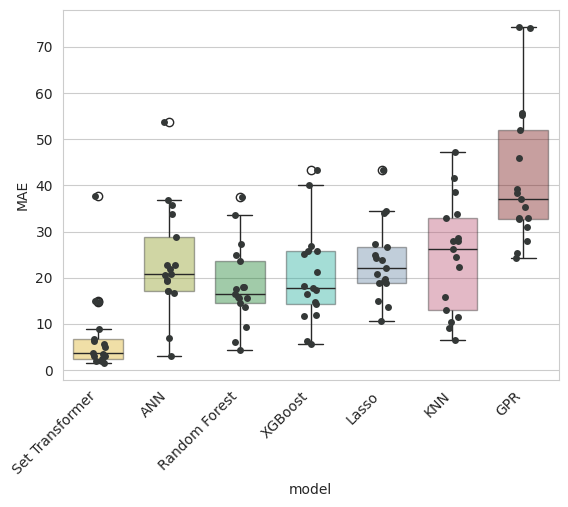

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = { 'alpha': 0.4} #'facecolor': 'blue',
# Let's say you have three models, then you might choose three colors with transparency.
# You can adjust colors and alpha (for transparency) values as you prefer.
colors = ['#fac205', '#9aae07',"#028f1e", '#06c2ac', '#5a86ad', '#cb416b', '#840000']  # Here 55 at the end of each color sets the transparency

palette = sns.color_palette(colors)

ax = sns.boxplot(x='model', y='MAE', data=df_test_all, palette=palette, boxprops=boxprops,  width=0.7)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('model_compare.svg', dpi =600)

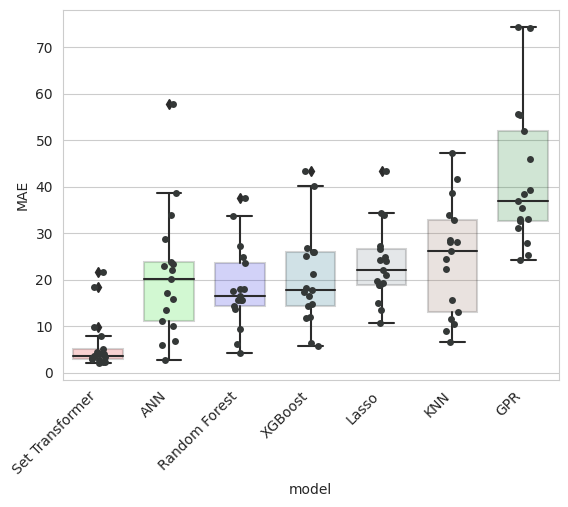

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = { 'alpha': 0.2} #'facecolor': 'blue',
# Let's say you have three models, then you might choose three colors with transparency.
# You can adjust colors and alpha (for transparency) values as you prefer.
colors = ["#FF000025", "#00FF0000", "#0000FF55", "#047495", "#748b97", "#9c6d57", "#028f1e"]  # Here 55 at the end of each color sets the transparency

palette = sns.color_palette(colors)

ax = sns.boxplot(x='model', y='MAE', data=df_test_all, palette=palette, boxprops=boxprops,  width=0.7)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('model_compare.png', dpi =600)

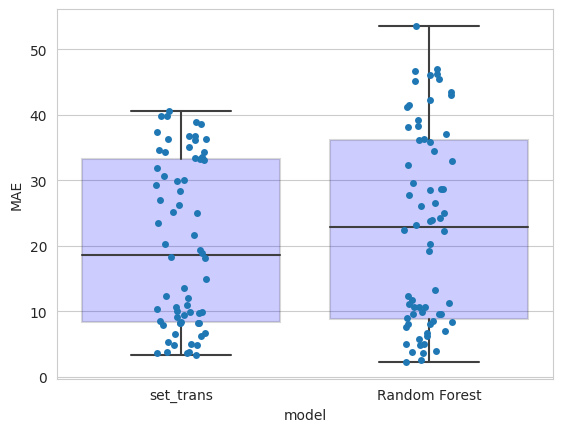

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
boxprops = {'facecolor': 'blue', 'alpha': 0.2}
ax= sns.boxplot(x='model',y='MAE',data=df_test_all, boxprops=boxprops)
ax = sns.stripplot(x="model", y="MAE",data=df_test_all)

In [ ]:
mae = mean_absolute_error(y_true, y_pred)#, multioutput='raw_values')
mae

12.290614

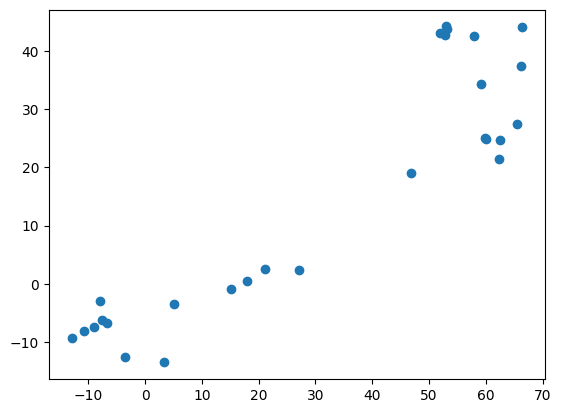

In [ ]:
plt.scatter(y_true[:,1], y_pred[:,1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, df_y_scaled, train_size=0.80, random_state=888)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     dataset, df_y_scaled, train_size=0.990, random_state=0)
Ndims = int(dataset.shape[1]/3)

device ='cpu'
epochs, learning_rate, batch_size = 650, 1e-3, 12
dropout_ratio = 0.15  # replace with your desired value

model = SmallSetTransformer_v2(dropout_ratio, device, epochs, learning_rate, batch_size)

# Prepare your data
train_data_1, train_data_2,train_data_3, y_new = np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float), np.array(y_train, dtype=np.float16)


# Train the model
losses = model.train_model(train_data_1, train_data_2,train_data_3, y_new)

100%|██████████| 650/650 [11:56<00:00,  1.10s/it]


100%|██████████| 650/650 [06:25<00:00,  1.69it/s]


MAE: 0.014 (0.020)


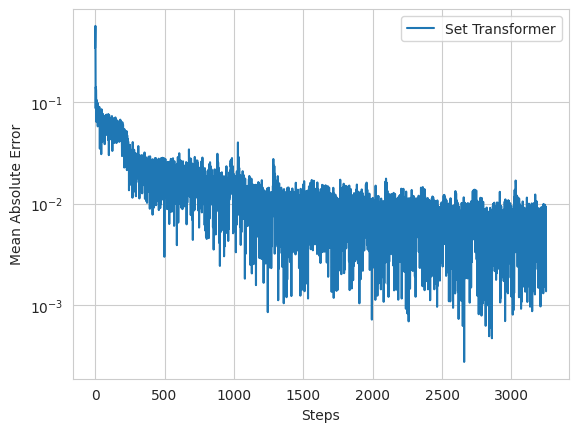

In [ ]:
models = [
    ("Set Transformer", SmallSetTransformer_v2(dropout_ratio=0.15)), #dropout_ratio,  device, epochs, learning_rate, batch_size
]
device='cpu'
losses=[]

Ndims = int(dataset.shape[1]/3)
train_data_1, train_data_2,train_data_3, y_new = np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float), np.array(y_train, dtype=np.float16)

for _name, _model in models:
    _losses = train(_model, train_data_1, train_data_2, train_data_3 ,y_new)
    test(_model, train_data_1, train_data_2, train_data_3 ,y_new)

    plt.plot(_losses, label=_name)
    losses.append(_losses)

print('MAE: %.3f (%.3f)' % (np.mean(losses), np.std(losses)))
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Mean Absolute Error")
plt.yscale("log")
plt.show()

In [ ]:
import os
torch.save({'state_dict':model.state_dict()},
        os.path.join('/content/', 'model.tar'))

In [ ]:
import os
net=SmallSetTransformer_v2(dropout_ratio, device, epochs, learning_rate, batch_size)
ckpt = torch.load(os.path.join('/content/', 'model.tar'))
net.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

In [ ]:
print('MAE: %.3f (%.3f)' % (np.mean(losses), np.std(losses)))

MAE: 0.021 (0.028)


In [ ]:
net=SmallSetTransformer_v2()
ckpt = torch.load(os.path.join('/content', 'model.tar'),map_location=torch.device('cpu'))
net.load_state_dict(ckpt['state_dict'])
_model = net#.load_state_dict(ckpt['state_dict'])

In [ ]:
Ndims = int(dataset.shape[1]/3)
train_data_1, train_data_2,train_data_3, y_train = np.array(X_train.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_train, dtype=np.float16)
valid_data = np.concatenate((train_data_1, train_data_2,train_data_3), axis=1)
y_pred_train, std_train = model.test_model(train_data_1, train_data_2,train_data_3, y_train) # , std_pred

y_true= scalery.inverse_transform(y_train)
y_pred= scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))

IndexError: index 33 is out of bounds for axis 0 with size 33

In [ ]:
Ndims = int(dataset.shape[1]/3)
train_data_1, train_data_2,train_data_3, y_train = np.array(X_test.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_test.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_test.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_test, dtype=np.float16)
valid_data = np.concatenate((train_data_1, train_data_2,train_data_3), axis=1)
y_pred_train, std_train = model.test_model(train_data_1, train_data_2,train_data_3, y_train) # , std_pred

y_true= scalery.inverse_transform(y_train)
y_pred= scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))

0.6309557122895804
0.5497997722789907
0.6007787968225978
0.6747092036478362


In [ ]:
Ndims = np.int(dataset.shape[1]/3)
train_data_1, train_data_2,train_data_3, y_train = np.array(X_train.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_train, dtype=np.float16)
valid_data = np.concatenate((train_data_1, train_data_2,train_data_3), axis=1)
y_pred_train, std_train = model.test_model(train_data_1, train_data_2,train_data_3, y_train) # , std_pred

y_true= scalery.inverse_transform(y_train)
y_pred= scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))

0.7963267598999544
0.7483745517054976
0.8094916108392323
0.7975965671263294


In [ ]:
Ndims = int(dataset.shape[1]/3)
train_data_1, train_data_2,train_data_3, y_train = np.array(X_train.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_train, dtype=np.float16)

y_pred_train, train_std = test(_model, train_data_1, train_data_2, train_data_3 ,y_train) # , std_pred

y_true= scalery.inverse_transform(y_train)
y_pred= scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))

0.919219233225912
0.8992973339261046
0.8773827179620325
0.942477236907407


In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
from optuna.samplers import TPESampler

X_train, X_test, y_train, y_test = train_test_split(
    dataset, df_y_scaled, train_size=0.8, random_state=888)

X, y = X_train.values, y_train
Ndims = np.int(dataset.shape[1]/3)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=888)

def objective(trial, cv, X, y):
    # Define hyperparameters
    dropout_ratio = trial.suggest_float('dropout_ratio', 0.1, 0.2, step=0.05) #5
    learning_rate = trial.suggest_categorical('learning_rate', [ 1e-3]) #3
    batch_size = trial.suggest_categorical("batch_size", [12, 32, 64]) #4
    epochs = trial.suggest_int('epochs',500, 700, step =50) # 13

    device = "cpu"#torch.device("cuda" if torch.cuda.is_available() else "cpu")

    mse = []
    mae = []
    r2_list = []

    for train_ix, valid_ix in cv.split(X):
        X_train, X_valid = X[train_ix, :], X[valid_ix, :]
        y_train, y_valid = y[train_ix], y[valid_ix]

        train_data_1, train_data_2, train_data_3, y_new = X_train[:, :Ndims], X_train[:, Ndims:2*Ndims], X_train[:, 2*Ndims:], y_train
        #valid_data_1, valid_data_2, valid_data_3, y_valid = X_valid[:, :Ndims], X_valid[:, Ndims:2*Ndims], X_valid[:, 2*Ndims:], y_valid
        valid_data_1, valid_data_2, valid_data_3, y_valid= np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled[:], dtype=np.float16)

        model = SmallSetTransformer_v2(dropout_ratio, device, epochs, learning_rate, batch_size)
        losses = model.train_model(train_data_1, train_data_2, train_data_3, y_new)

        valid_data = np.concatenate((valid_data_1, valid_data_2, valid_data_3), axis=1)
        y_pred = model.predict(valid_data)

        mse = mean_squared_error(y_valid, y_pred)
        mae = mean_absolute_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)

        print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')
        r2_list.append(r2)

    return np.mean(r2_list)

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(lambda trial: objective(trial, cv_outer, X, y), n_trials=2)

best_params = study.best_params


[I 2023-10-05 19:25:33,102] A new study created in memory with name: no-name-62e56605-2564-4132-8de6-54fd7f9ad075
100%|██████████| 550/550 [04:20<00:00,  2.11it/s]


MSE: 0.23801179230213165, MAE: 0.438027948141098, R^2: -4.408450201254883


100%|██████████| 550/550 [04:15<00:00,  2.15it/s]


MSE: 0.2383197546005249, MAE: 0.4298902750015259, R^2: -3.8664487112756056


100%|██████████| 550/550 [04:19<00:00,  2.12it/s]


MSE: 0.29006680846214294, MAE: 0.4885082542896271, R^2: -6.531480533576258


100%|██████████| 550/550 [04:05<00:00,  2.24it/s]


MSE: 0.2779196798801422, MAE: 0.47038522362709045, R^2: -6.25917771520547


100%|██████████| 550/550 [04:19<00:00,  2.12it/s]
[I 2023-10-05 19:46:54,157] Trial 0 finished with value: -4.9590988420648205 and parameters: {'dropout_ratio': 0.15000000000000002, 'learning_rate': 0.001, 'batch_size': 12, 'epochs': 550}. Best is trial 0 with value: -4.9590988420648205.


MSE: 0.24082566797733307, MAE: 0.42922282218933105, R^2: -3.729937049011882


100%|██████████| 600/600 [01:34<00:00,  6.35it/s]


MSE: 0.3111385703086853, MAE: 0.5063955187797546, R^2: -7.13153128176996


100%|██████████| 600/600 [01:33<00:00,  6.43it/s]


MSE: 0.3508590757846832, MAE: 0.5416670441627502, R^2: -8.436938221713335


100%|██████████| 600/600 [01:33<00:00,  6.41it/s]


MSE: 0.3579978048801422, MAE: 0.5542090535163879, R^2: -7.66384769760768


100%|██████████| 600/600 [01:31<00:00,  6.55it/s]


MSE: 0.3648584187030792, MAE: 0.5617467761039734, R^2: -7.947337591307636


100%|██████████| 600/600 [01:30<00:00,  6.60it/s]
[I 2023-10-05 19:54:38,773] Trial 1 finished with value: -7.597860501168819 and parameters: {'dropout_ratio': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 600}. Best is trial 0 with value: -4.9590988420648205.


MSE: 0.3058423697948456, MAE: 0.5030108094215393, R^2: -6.809647713445479


In [ ]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout_ratio,params_epochs,params_learning_rate,state
0,0,-0.214566,2023-06-17 03:39:37.896940,2023-06-17 03:44:54.167967,0 days 00:05:16.271027,64,0.203057,80,0.006704,COMPLETE
1,1,-0.685245,2023-06-17 03:44:54.171374,2023-06-17 03:49:17.566352,0 days 00:04:23.394978,128,0.268950,86,0.000702,COMPLETE
2,2,-0.351837,2023-06-17 03:49:17.567771,2023-06-17 03:50:39.488052,0 days 00:01:21.920281,256,0.388165,32,0.002104,COMPLETE


In [ ]:

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = dataset.values, df_y_scaled #make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()


for train_ix, test_ix in cv_outer.split(X):
 # split data
 X_train, X_test = X[train_ix, :], X[test_ix, :]
 y_train, y_test = y[train_ix], y[test_ix]
 train_data_1, train_data_2,train_data_3, y_new = X_train[:, :Ndims], X_train[:, Ndims:2*Ndims], X_train[:, 2*Ndims:], y_train
 test_data_1, test_data_2,test_data_3, y_valid = X_test[:, :Ndims],  X_test[:, Ndims:2*Ndims], X_test[:, 2*Ndims:],  y_test
 cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
 device='cuda'
 model = SmallSetTransformer_v2(dropout_ratio, device, epochs, learning_rate, batch_size)
 space = dict()
 space['dropout_ratio'] = [0.1, 0.15, 0.2]
 space['epochs'] = [2, 3, 5]
 space['learning_rate'] = [0.1, 0.001, 0.05]
 space['batch_size'] = [32, 124, 64]
 # define search
 search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)


 # execute search
 result = search.fit(X_train, y_train)
 # get the best performing model fit on the whole training set
 best_model = result.best_estimator_
 # evaluate model on the hold out dataset
 yhat = best_model.predict(X_test)
 # evaluate the model
 acc = accuracy_score(y_test, yhat)
 # store the result
 outer_results.append(acc)
 # report progress
 print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

In [ ]:
from sklearn.metrics import r2_score
def train_test_eval(seed):
  _model = SmallSetTransformer_v2()
  #_model.
  np.random.seed(seed)
  X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(full_dataset, target = ['L','a','b'],
                                                                              train_size=0.8, valid_size=0.1, test_size=0.1)
  train_data_1, train_data_2,train_data_3, y_new = np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float), np.array(y_train, dtype=np.float16)

  train(_model, train_data_1, train_data_2, train_data_3 ,y_new)
  test_data_1, test_data_2,test_data_3, y_valid = np.array(X_valid.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_valid.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_valid.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_valid, dtype=np.float16)

  y_pred_val , valid_std=test(_model, test_data_1, test_data_2, test_data_3 ,y_valid) #

  test_data_1, test_data_2,test_data_3, y_test = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)
  y_pred_test, test_std = test(_model, test_data_1, test_data_2, test_data_3 ,y_test) #

  return r2_score(y_valid, y_pred_val), r2_score(y_test, y_pred_test, multioutput='variance_weighted')

In [ ]:
test_score=[]
val_score=[]

for i in range(5):
  r2_val , r2_test = train_test_eval(i)
  test_score.append(r2_test)
  val_score.append(r2_val)

TypeError: ignored

In [ ]:
from sklearn.metrics import r2_score
test_data_1, test_data_2,test_data_3, y_valid = np.array(X_valid.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_valid.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_valid.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_valid, dtype=np.float16)
#scalery.inverse_transform(y_train)
y_pred, test_std = test(_model, test_data_1, test_data_2, test_data_3 ,y_valid) #
r2_score(y_valid, y_pred)#, multioutput='variance_weighted')

0.33030464764313294

In [ ]:
 y_pred

array([[0.7780638 , 0.27584717, 0.89383906],
       [0.55147684, 0.11876311, 0.54275453],
       [0.5815166 , 0.01611055, 0.68886364],
       [0.33368874, 0.2910315 , 0.31775215],
       [0.319744  , 0.73329437, 0.14675435],
       [0.531662  , 0.889334  , 0.5432378 ],
       [0.2592411 , 0.4858783 , 0.33319414],
       [0.29351124, 0.9242093 , 0.18923599],
       [0.17391919, 0.48536795, 0.33934337],
       [0.2696485 , 0.62031883, 0.22190149],
       [0.33369258, 0.7847618 , 0.16041242],
       [0.3665146 , 0.16168842, 0.44781357],
       [0.4247331 , 0.95282143, 0.29379708],
       [0.5534827 , 0.8955725 , 0.5435107 ],
       [0.39481905, 0.23059313, 0.29898572],
       [0.29943258, 0.67317104, 0.13620815]], dtype=float32)

In [ ]:
y_valid

array([[0.4702 , 0.3523 , 1.     ],
       [0.452  , 0.1038 , 0.559  ],
       [0.1245 , 0.4475 , 0.06082],
       [0.325  , 0.267  , 0.2961 ],
       [0.3706 , 0.924  , 0.1284 ],
       [0.4717 , 0.8555 , 0.525  ],
       [0.2025 , 0.496  , 0.276  ],
       [0.2213 , 0.905  , 0.169  ],
       [0.083  , 0.581  , 0.3716 ],
       [0.2905 , 0.638  , 0.2365 ],
       [0.3735 , 0.533  , 0.1014 ],
       [0.3872 , 0.2    , 0.419  ],
       [0.381  , 0.916  , 0.2201 ],
       [0.5337 , 0.9062 , 0.5337 ],
       [0.5947 , 0.06665, 0.3582 ],
       [0.2766 , 0.543  , 0.1081 ]], dtype=float16)

In [ ]:
test_data_1, test_data_2,test_data_3, y_valid = np.array(X_valid.iloc[:, :Ndims].values, dtype=np.float16),  np.array(X_valid.iloc[:, Ndims:2*Ndims].values, dtype=np.float16), np.array(X_valid.iloc[:, 2*Ndims:].values, dtype=np.float16), np.array(y_valid, dtype=np.float16)
valid_data = np.concatenate((test_data_1, test_data_2,test_data_3), axis=1)
y_pred, std_test = model.test_model(test_data_1, test_data_2,test_data_3, y_valid)
r2_score(y_valid, y_pred)#

ValueError: ignored

In [ ]:
r2_score(scalery.inverse_transform(y_valid), scalery.inverse_transform(y_pred))

0.3298595766944384

In [ ]:
print('L: ', r2_score(y_valid[:,0], y_pred[:,0]))#, multioutput='variance_weighted'))
print('a: ', r2_score(y_valid[:, 1], y_pred[:, 1]))#, multioutput='variance_weighted'))
print('b: ', r2_score(y_valid[:, 2], y_pred[:, 2]))#, multioutput='variance_weighted'))

L:  0.8515664124210817
a:  0.8574585352816576
b:  0.9546913412148376


In [ ]:
test_data_1, test_data_2,test_data_3, y_test = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)
y_pred , valid_std= test(_model, test_data_1, test_data_2, test_data_3 ,y_test) #


#print('MAE', mean_absolute_error(y_true, y_pred, multioutput='uniform_average'))
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.8747094323755839

In [ ]:
y_test

array([[0.3457 , 0.6953 , 0.4663 ],
       [0.2163 , 0.463  , 0.343  ],
       [0.5396 , 0.781  , 0.6826 ],
       [0.3596 , 0.219  , 0.723  ],
       [0.415  , 0.781  , 0.1757 ],
       [0.4297 , 0.2434 , 0.1843 ],
       [0.553  , 0.06665, 0.3987 ],
       [0.2627 , 0.514  , 0.169  ],
       [0.3735 , 0.10474, 0.412  ],
       [0.295  , 0.2803 , 0.3252 ],
       [0.415  , 0.924  , 0.2634 ],
       [0.9404 , 0.219  , 0.1824 ],
       [0.05533, 0.6094 , 0.03378],
       [0.1798 , 0.4475 , 0.3445 ],
       [0.4011 , 0.0476 , 0.3987 ],
       [0.9546 , 0.219  , 0.8853 ],
       [0.3735 , 0.3142 , 0.1081 ]], dtype=float16)

In [ ]:
test_data_1, test_data_2,test_data_3, y_test = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)
#valid_data = np.concatenate((test_data_1, test_data_2,test_data_3), axis=1)
y_pred, std_test= model.test_model(test_data_1, test_data_2,test_data_3, y_test)#valid_data)
r2_score(y_test, y_pred)#

NameError: ignored

In [ ]:
import sklearn
sklearn.metrics.mean_squared_error(y_test , y_pred)

0.0013273138

ValueError: ignored

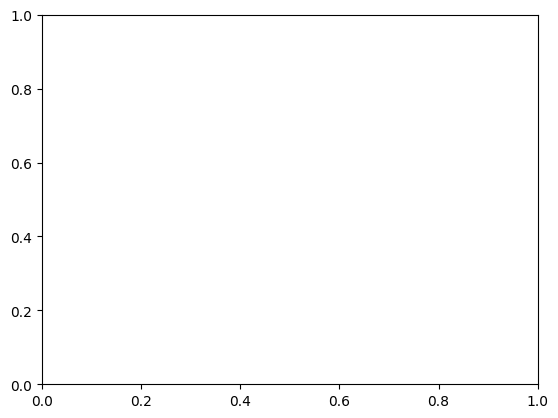

In [ ]:
plt.scatter(std_test, np.mean(abs(y_test - y_pred)[:, :], axis=1))

In [ ]:
np.mean((y_test - y_pred)[:, 1:], axis=1)

array([ 0.06815553,  0.01150098,  0.2624156 ,  0.11387426,  0.01525185,
        0.08021795, -0.05142641, -0.05117393,  0.06261709,  0.04872565,
        0.0785331 ,  0.04540117,  0.06333899,  0.02903731,  0.16611826,
       -0.01935785,  0.16388372, -0.07848347, -0.11119473, -0.18454361,
        0.05679636,  0.00878827, -0.19181482, -0.00543249, -0.05587374,
        0.03018822, -0.05144265, -0.1240724 ,  0.04421252, -0.03191605,
       -0.03607793,  0.01806982, -0.08445232], dtype=float32)

(array([16.,  4.,  6.,  1.,  2.,  3.,  0.,  0.,  0.,  1.]),
 array([7.77542591e-05, 3.49690905e-03, 6.91606384e-03, 1.03352191e-02,
        1.37543734e-02, 1.71735287e-02, 2.05926839e-02, 2.40118392e-02,
        2.74309926e-02, 3.08501478e-02, 3.42693031e-02]),
 <BarContainer object of 10 artists>)

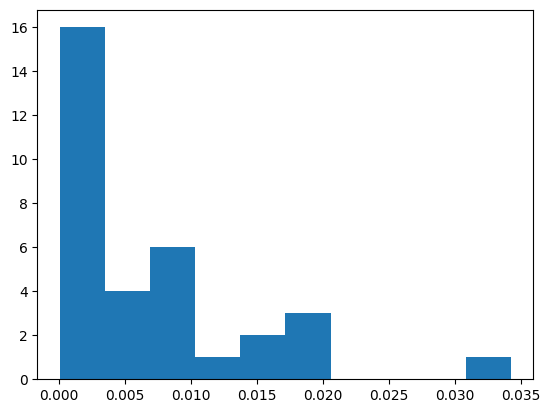

In [ ]:
plt.hist(std_test)

In [ ]:
print('L: ', r2_score(y_test[:,0], y_pred[:,0]))#, multioutput='variance_weighted'))
print('a: ', r2_score(y_test[:, 1], y_pred[:, 1]))#, multioutput='variance_weighted'))
print('b: ', r2_score(y_test[:, 2], y_pred[:, 2]))#, multioutput='variance_weighted'))

L:  0.6673968137263685
a:  0.6667450605009801
b:  0.6813376068787629


In [ ]:
!pip install colorspacious

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
color_list_exp = []

for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)

  c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
  color_list_exp.append(str(c))

NameError: ignored

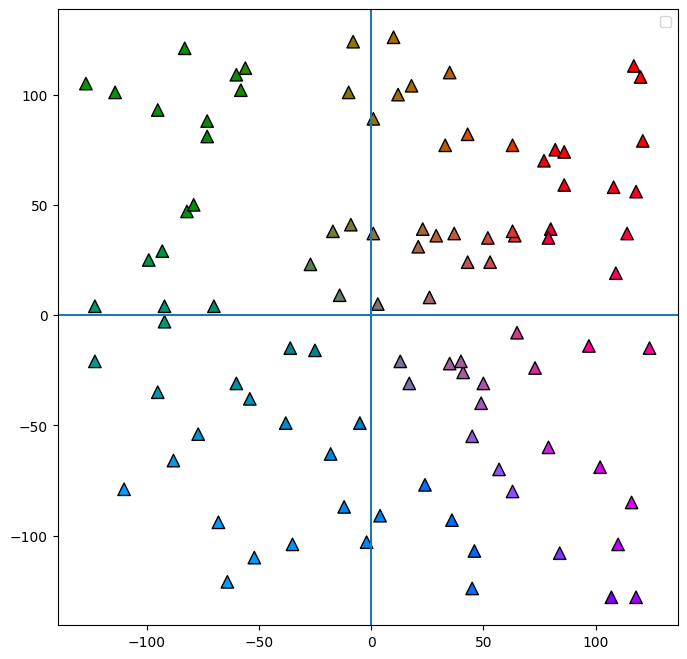

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x=0)
ax.axhline(y=0)
#ax.scatter(a_,b_, c=color_list, s=80, label='database')
ax.scatter(pd.DataFrame(lab_colors_sample ).iloc[:,1],pd.DataFrame(lab_colors_sample ).iloc[:,2], c=color_list_exp, marker='^', edgecolors='black', s=80)#, label='experimental batches')
#ax.scatter(gen_data['a'], gen_data['b'], c=color_list_gen, marker='s', edgecolors='black', s=80, label='generative model')
plt.legend()

In [ ]:
import random
sample_size = 100  # Specify the desired sample size
lab_colors_sample = random.sample(lab_colors, sample_size)
num_colors = len(lab_colors_sample)

In [ ]:
y_pred = lab_colors_sample

In [ ]:
from itertools import product

a_values = range(-128, 128)
b_values = range(-128, 128)
lab_colors = [(50, a, b) for a, b in product(a_values, b_values)]
num_colors = len(lab_colors)

In [ ]:
!pip install colormath

In [ ]:
import numpy as np
def dominant_hue(color):
    """
    Calculate the dominant hue of a Lab color.
    """
    a, b = color[1], color[2]
    hue = np.arctan2(b, a) * 180 / np.pi
    if hue < 0:
        hue += 360
    return hue

def divide_color_palette(palette):
    """
    Divide the color palette into basic color regions.
    """
    color_regions = {
        'red': [],
        'green': [],
        'blue': [],
        'cyan': [],
        'magenta': [],
        'yellow': []
    }
    for idx, color in enumerate(palette):
        hue = dominant_hue(color)
        if hue >= 0 and hue < 60:
            color_regions['red'].append(idx)
        elif hue >= 60 and hue < 120:
            color_regions['yellow'].append(idx)
        elif hue >= 120 and hue < 180:
            color_regions['green'].append(idx)
        elif hue >= 180 and hue < 240:
            color_regions['cyan'].append(idx)
        elif hue >= 240 and hue < 300:
            color_regions['blue'].append(idx)
        elif hue >= 300 and hue < 360:
            color_regions['magenta'].append(idx)
        else:
            color_regions['red'].append(idx)  # Handle edge case near red
    return color_regions

# Example usage
color_palette =df_y.values
divided_colors = divide_color_palette(color_palette)

# Print the colors in each region
for region, colors in divided_colors.items():
    print(f"{region}: {colors}")


red: [4, 5, 17, 18, 38, 46, 64, 65, 74, 99, 100, 103, 104, 105, 106, 107, 130, 131, 132, 141, 142, 152, 160]
green: [27, 28, 29, 72, 93, 94, 95, 96]
blue: [7, 10, 20, 24, 39, 40, 41, 48, 49, 51, 60, 61, 62, 63, 79, 80, 92, 108, 109, 110, 111, 120, 121, 122, 123, 125, 126, 127, 128, 135, 136, 137, 138, 139, 151, 155, 156, 157]
cyan: [0, 1, 2, 6, 11, 12, 13, 14, 15, 16, 19, 25, 26, 30, 71, 91, 140]
magenta: [3, 8, 9, 21, 22, 42, 43, 44, 45, 47, 50, 52, 54, 55, 56, 70, 75, 76, 77, 78, 81, 82, 84, 85, 101, 102, 112, 113, 114, 115, 116, 117, 118, 119, 124, 133, 134, 146, 149, 150, 153, 154, 159, 161, 162, 163, 164]
yellow: [23, 31, 32, 33, 34, 35, 36, 37, 53, 57, 58, 59, 66, 67, 68, 69, 73, 83, 86, 87, 88, 89, 90, 97, 98, 129, 143, 144, 145, 147, 148, 158]


In [ ]:
L=electrochromics['L* (Colored State)'].dropna().values
a_=electrochromics['a* (Colored State)'].dropna().values
b_=electrochromics['b*(Colored State)'].dropna().values

In [ ]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

y_pred = list(zip(L,a_,b_))
color_list = []

for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)
  try:
    c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
    color_list.append(str(c))
  except:
    pass

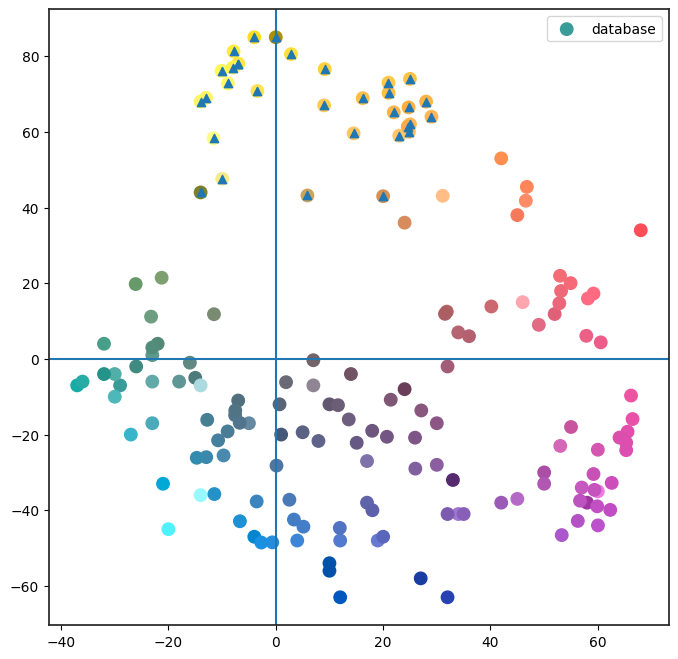

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x=0)
ax.axhline(y=0)
ax.scatter(a_,b_, c=color_list, s=80, label='database')
ax.scatter(a_[divided_colors['yellow']],b_[divided_colors['yellow']], marker='^')

#ax.scatter(exp_batches_a, exp_batches_b, c=color_list_exp, marker='^', edgecolors='black', s=80, label='experimental batches')
plt.legend()

In [ ]:
electrochromics.loc[divided_colors['yellow']].color

In [ ]:

dataset.loc[divided_colors['red']]

# Shapley

In [ ]:
!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
electrochromics.shape

(167, 35)

In [ ]:
dataset.shape

(165, 3168)

In [ ]:
explainer = shap.GradientExplainer(
    model = model,
    data = [torch.FloatTensor(dataset.values)])#,
    #link = "identity")

In [ ]:
data = [torch.FloatTensor(dataset.values)]
shap_values = explainer.shap_values(data)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


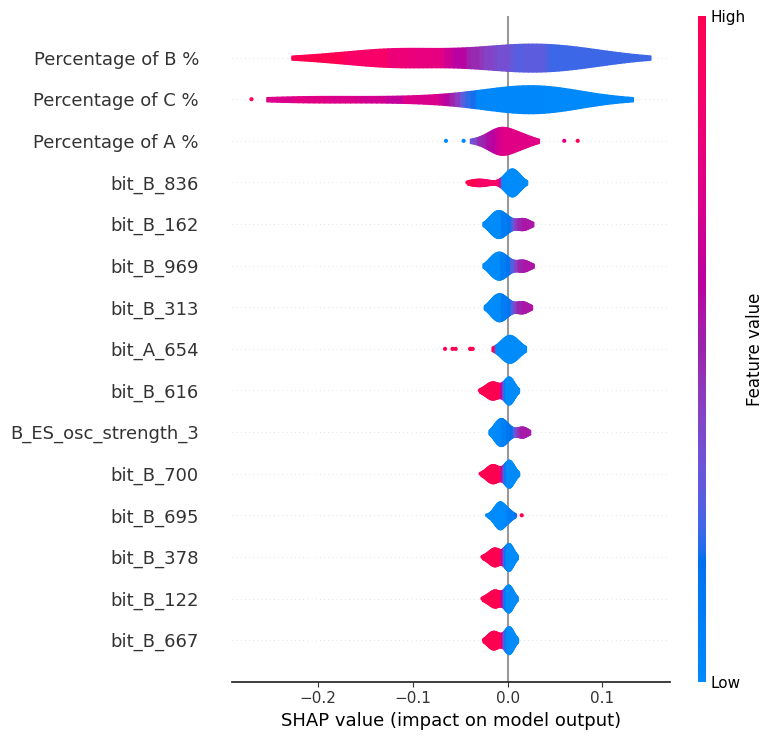

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['blue']]+ shap_values[2][divided_colors['blue']], dataset.loc[divided_colors['blue']].values, feature_names = dataset.columns, max_display=15, plot_type='violin')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


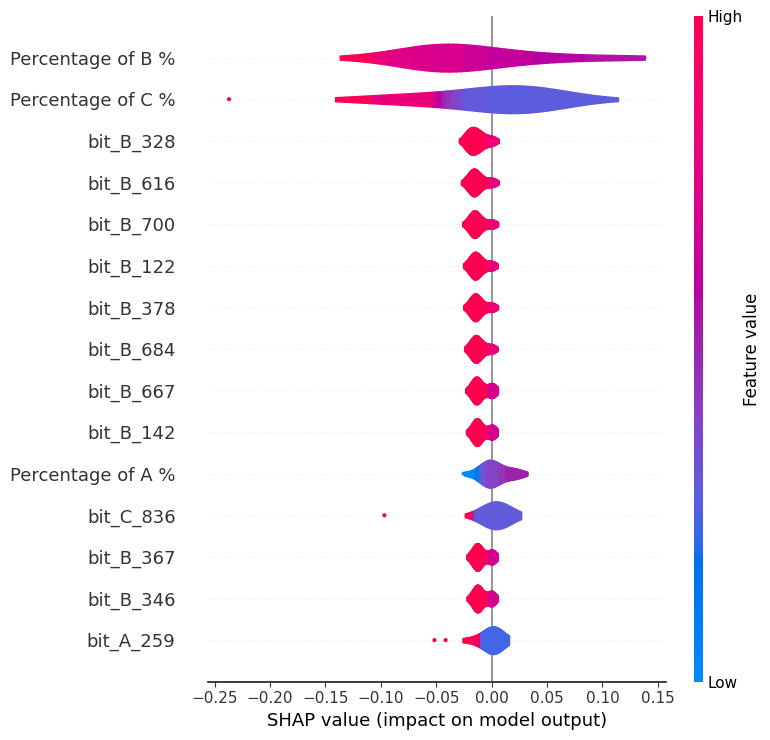

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['cyan']]+ shap_values[2][divided_colors['cyan']], dataset.loc[divided_colors['cyan']].values, feature_names = dataset.columns, max_display=15, plot_type='violin')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


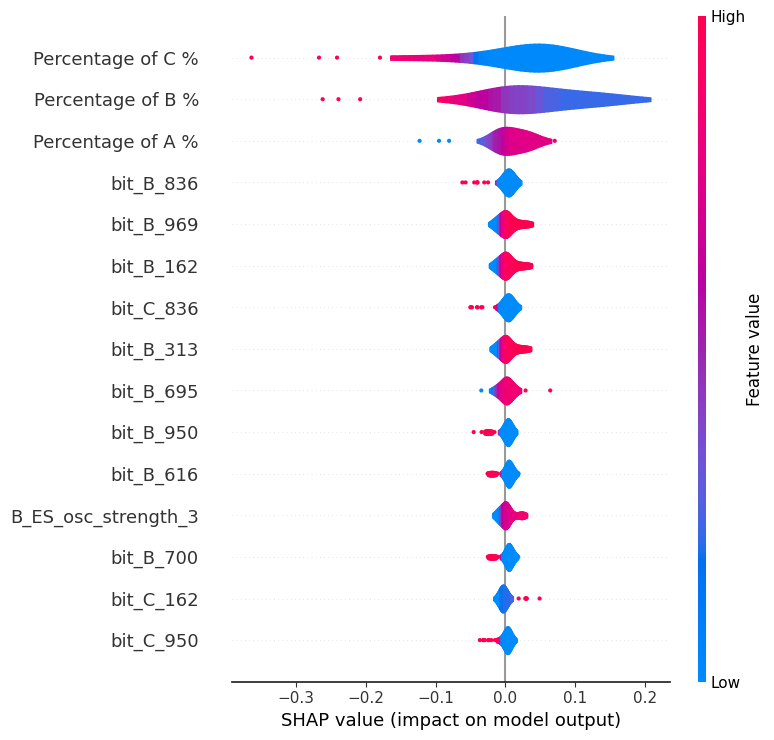

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['magenta']]+ shap_values[2][divided_colors['magenta']], dataset.loc[divided_colors['magenta']].values, feature_names = dataset.columns, max_display=15, plot_type='violin')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


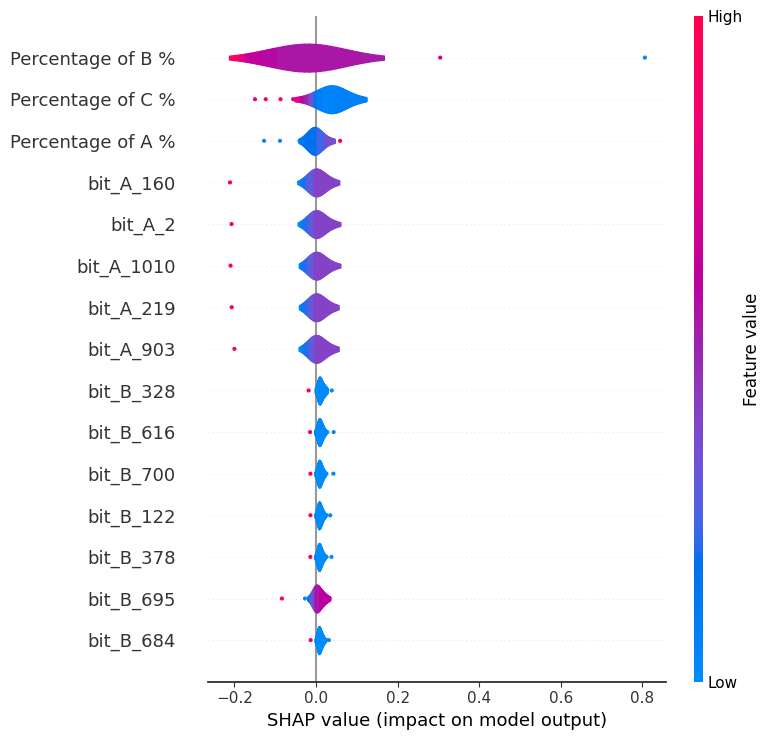

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['yellow']]+ shap_values[2][divided_colors['yellow']], dataset.loc[divided_colors['yellow']].values, feature_names = dataset.columns, max_display=15, plot_type='violin')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


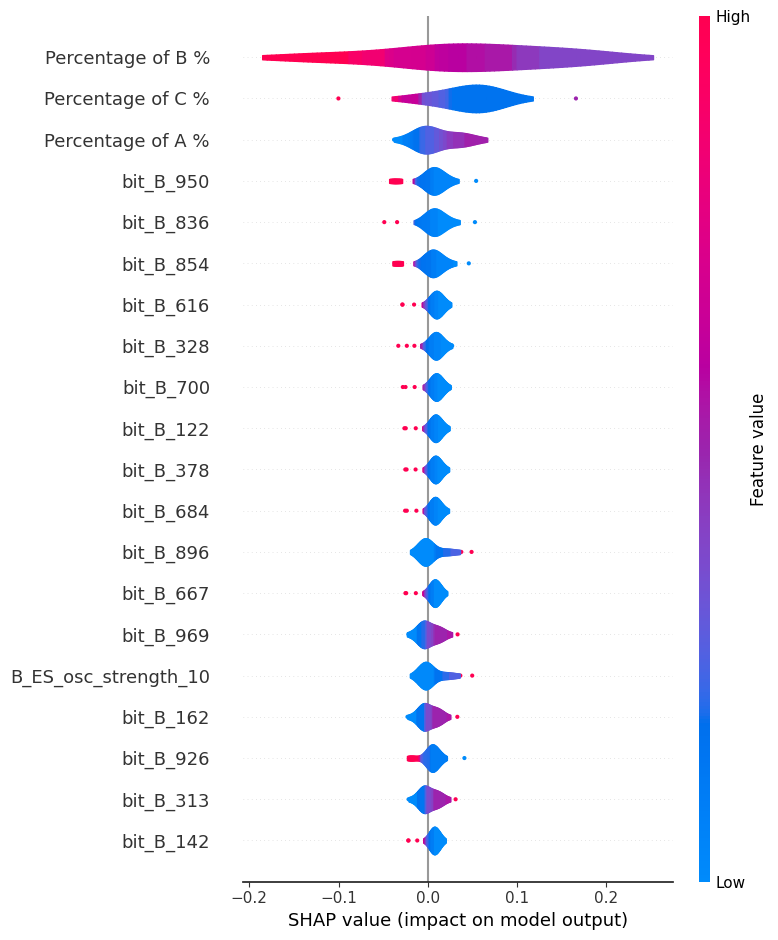

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['red']]+ shap_values[2][divided_colors['red']], dataset.loc[divided_colors['red']].values, feature_names = dataset.columns, max_display=20, plot_type='violin')


In [ ]:
selected_indices

[2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2089,
 2090,
 2091,
 2092,
 2093,
 2094,
 2095,
 2096,
 2097,
 2098,
 2099,
 2100,
 2101,
 2102,
 2103,
 2104,
 2105,
 2106,
 2107,
 2108,
 2109,
 2110]

In [ ]:
dataset.iloc[divided_colors['green'],  selected_indices]

,B_dipole,B_molar_mass,B_molar_volume,B_electronic_spatial_extent,B_homo_energy,B_lumo_energy,B_electronegativity,B_hardness,B_ES_root_dipole,B_ES_root_molar_volume,...,B_ES_osc_strength_1,B_ES_osc_strength_2,B_ES_osc_strength_3,B_ES_osc_strength_4,B_ES_osc_strength_5,B_ES_osc_strength_6,B_ES_osc_strength_7,B_ES_osc_strength_8,B_ES_osc_strength_9,B_ES_osc_strength_10
27,0.228211,0.112564,0.079146,0.016848,0.487466,0.936796,0.151573,0.837011,0.572174,0.109040,...,0.041506,0.000556,0.792381,0.261816,0.028060,0.007842,0.052997,0.167902,0.010136,0.025119
28,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000
29,0.614986,0.617665,0.525954,0.483694,0.756763,0.991360,0.013659,0.797574,0.835903,0.822258,...,0.009331,0.000556,0.859683,0.539565,0.005612,0.001758,0.014428,0.008552,0.007086,0.005246
72,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000
93,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000
94,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000
95,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000
96,0.473627,0.098906,0.072080,0.014873,0.000000,0.211213,0.953725,0.386150,0.595102,0.138092,...,0.196911,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000


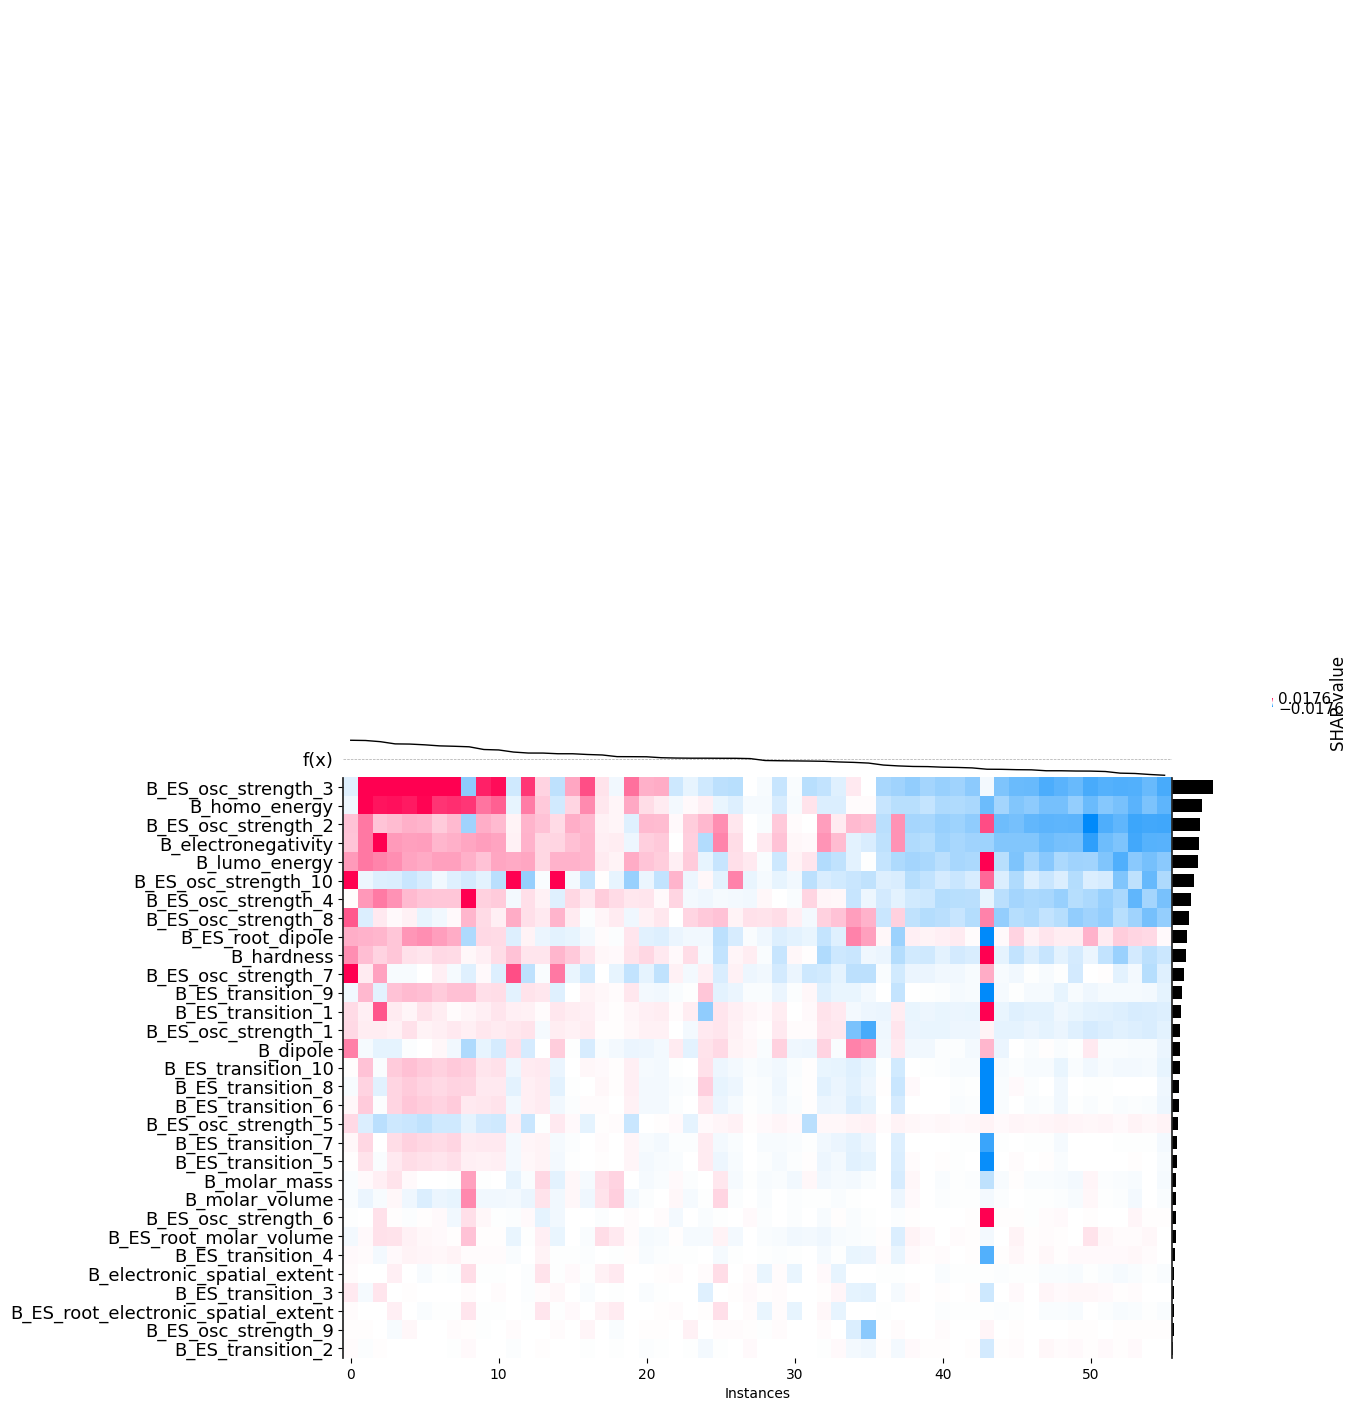

In [ ]:
# Define a list of feature names that you want to include in the plot
selected_features = df2_dft.columns.tolist()  # replace these with your actual feature names

# Find the indices of these features
selected_indices =  [list(dataset.columns).index(feature) for feature in selected_features]

# Slice shap_values and data to include only selected features
selected_shap_values = shap_values[1][df_a4[df_a4.smiles_C=='0'].index][:, selected_indices] + shap_values[2][df_a4[df_a4.smiles_C=='0'].index][:, selected_indices]
selected_data = dataset.iloc[df_a4[df_a4.smiles_C=='0'].index,  selected_indices]

# Create a new Explanation object with the selected features
shap_values_selected = shap.Explanation(values=selected_shap_values,
                                        data=selected_data,
                                        feature_names=selected_features)

# Plot the heatmap with the selected features
shap.plots.heatmap(shap_values_selected, max_display=32, plot_width=12 , instance_order=shap_values_selected.sum(1), show=False)#
plt.savefig("shap_heatmap.svg",dpi=700)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


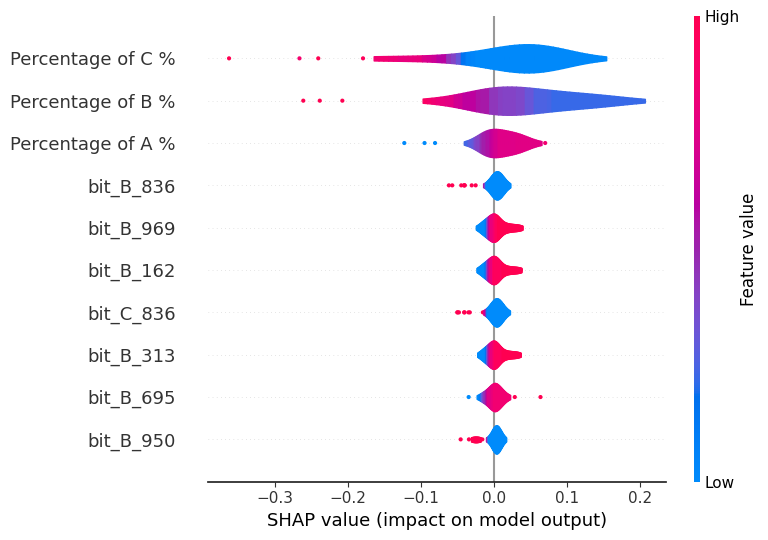

In [ ]:
shap.summary_plot(shap_values[1][divided_colors['magenta']]+ shap_values[2][divided_colors['magenta']], dataset.loc[divided_colors['magenta']].values, feature_names = dataset.columns, max_display=10, plot_type='violin', show=False)

plt.savefig("shap_summary_magenda.svg",dpi=700)

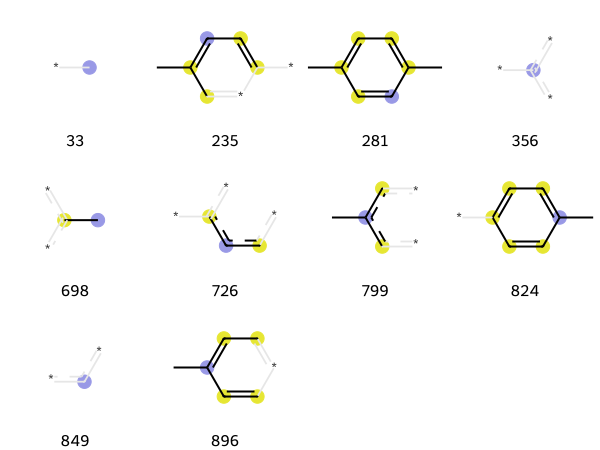

In [ ]:
epinephrine = Chem.MolFromSmiles('C1=CC(=CC=C1C)C')

bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(epinephrine, 3, nBits=1024, bitInfo=bi)
tpls = [(epinephrine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:40],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:40])

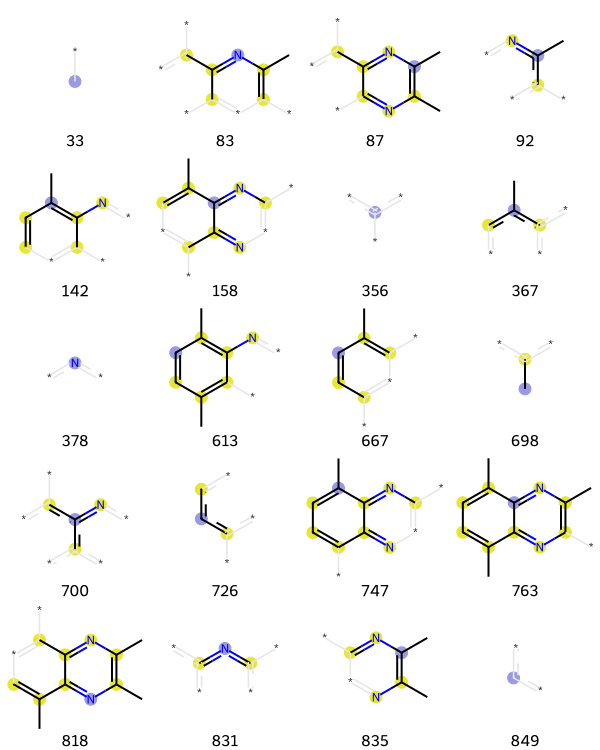

In [ ]:
epinephrine = Chem.MolFromSmiles('Cc1ccc(C)c2nc(C)c(C)nc12')

bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(epinephrine, 3, nBits=1024, bitInfo=bi)
tpls = [(epinephrine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:40],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:40])

In [ ]:
df_y.shape

(165, 3)

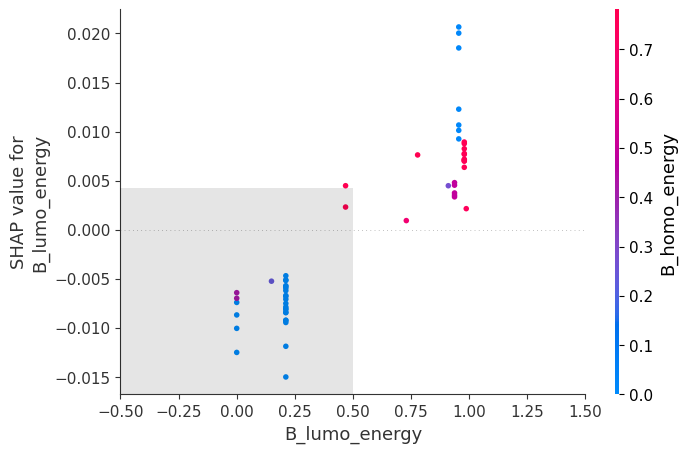

In [ ]:
shap.plots.scatter(shap_values_explained[:,"B_lumo_energy"], color=shap_values_explained[:,"B_homo_energy"])


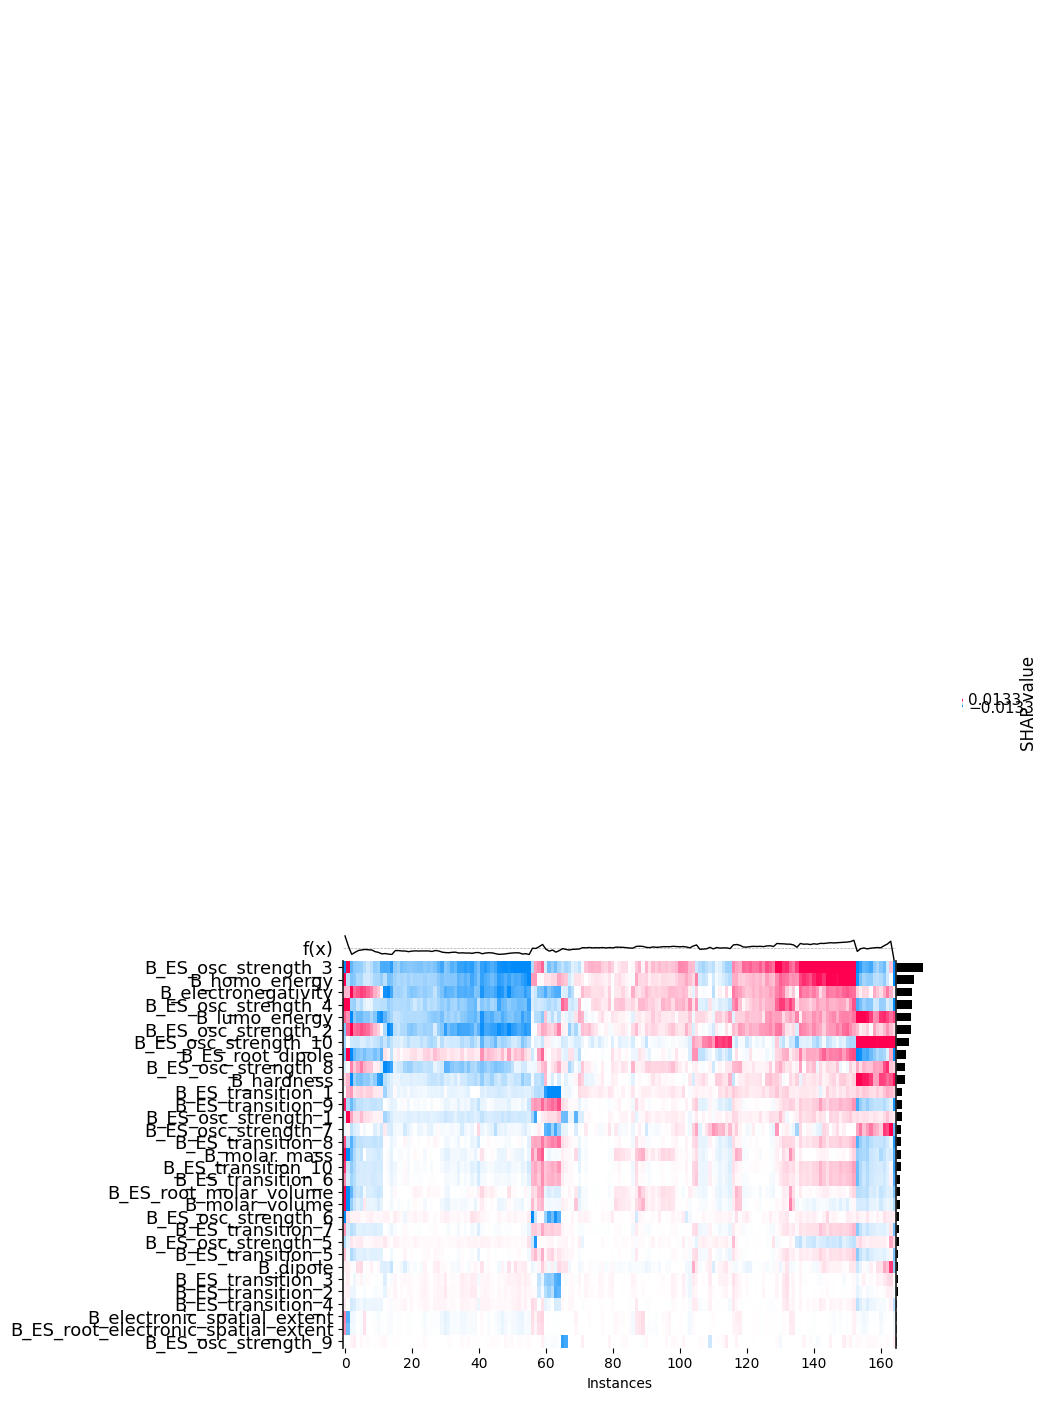

In [ ]:
# Define a list of feature names that you want to include in the plot
selected_features = df2_dft.columns.tolist()  # replace these with your actual feature names

# Find the indices of these features
selected_indices = [list(dataset.columns).index(feature) for feature in selected_features]

# Slice shap_values and data to include only selected features
selected_shap_values = shap_values[1][:, selected_indices]
selected_data = dataset.values[:, selected_indices]

# Create a new Explanation object with the selected features
shap_values_selected = shap.Explanation(values=selected_shap_values,
                                        data=selected_data,
                                        feature_names=selected_features)

# Plot the heatmap with the selected features
shap.plots.heatmap(shap_values_selected, max_display=32 )#, instance_order=shap_values_selected.sum(1))


In [ ]:
# Define a list of feature names in the order you want them to appear in the plot
feature_order = dataset.columns.tolist()

shap_values_explained = shap.Explanation(values=shap_values[1][:],
                                         data=dataset.values,
                                         feature_names=dataset.columns)

# Then you can call the heatmap plot function
shap.plots.heatmap(shap_values_explained, feature_order=dataset.columns.tolist())

IndexError: ignored

In [ ]:
shap_values_explained = shap.Explanation(values=shap_values[1][:], data=dataset.values, feature_names=dataset.columns)

# Then you can call the heatmap plot function
shap.plots.heatmap(shap_values_explained, instance_order=shap_values_explained.sum(1))#, max_display=30)

IndexError: ignored

In [ ]:
# find the index of the 'ES_osc_strength_3' feature in your dataset
feature_index = list(X_train.columns).index('ES_osc_strength_3')

# use this index to select the 'ES_osc_strength_3' feature from your shap values
feature_shap_values = shap_values[0][0].values[feature_index]  # Assuming that shap_values is a numpy array

# reshape the numpy array
reshaped_feature_shap_values = feature_shap_values.reshape(-1, 1)

# create a Shapley explanation for the specific feature
feature_shap_explanation = shap.Explanation(values=reshaped_feature_shap_values,
                                            data=X_train[['ES_osc_strength_3']].values,
                                            feature_names=['ES_osc_strength_3'])

# plot the Shapley values
shap.plots.scatter(feature_shap_explanation)


In [ ]:
shap.summary_plot(shap_values[1], dataset.loc[divided_colors['red']].values, feature_names = dataset.columns)#, plot_type='bar')

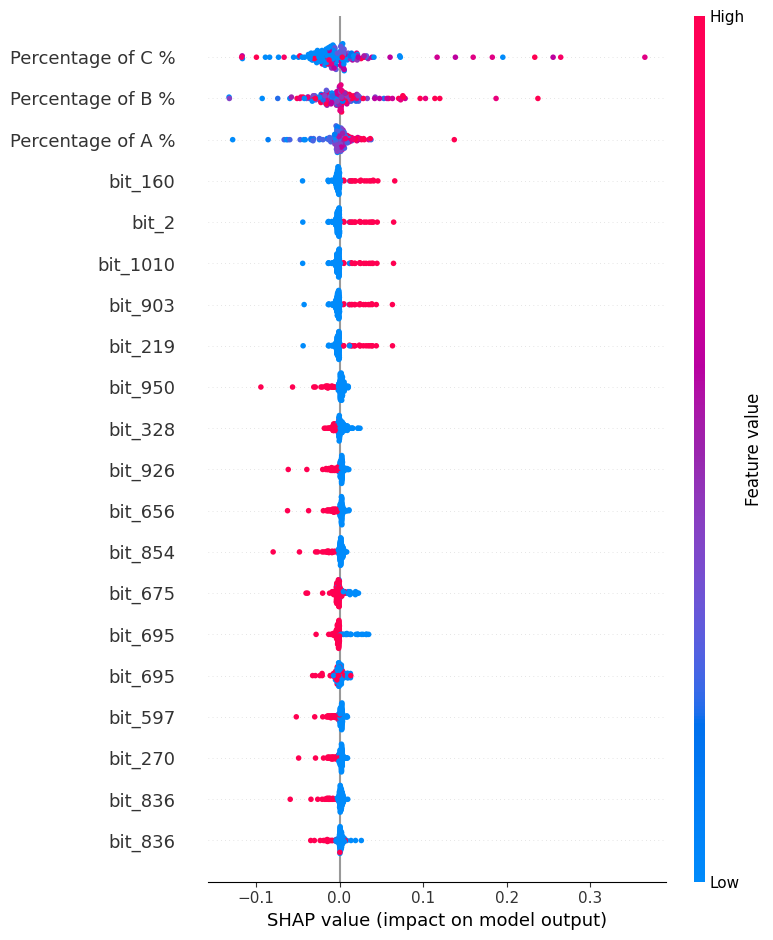

In [ ]:
shap.summary_plot(shap_values[2], dataset.values, feature_names = X_train.columns)

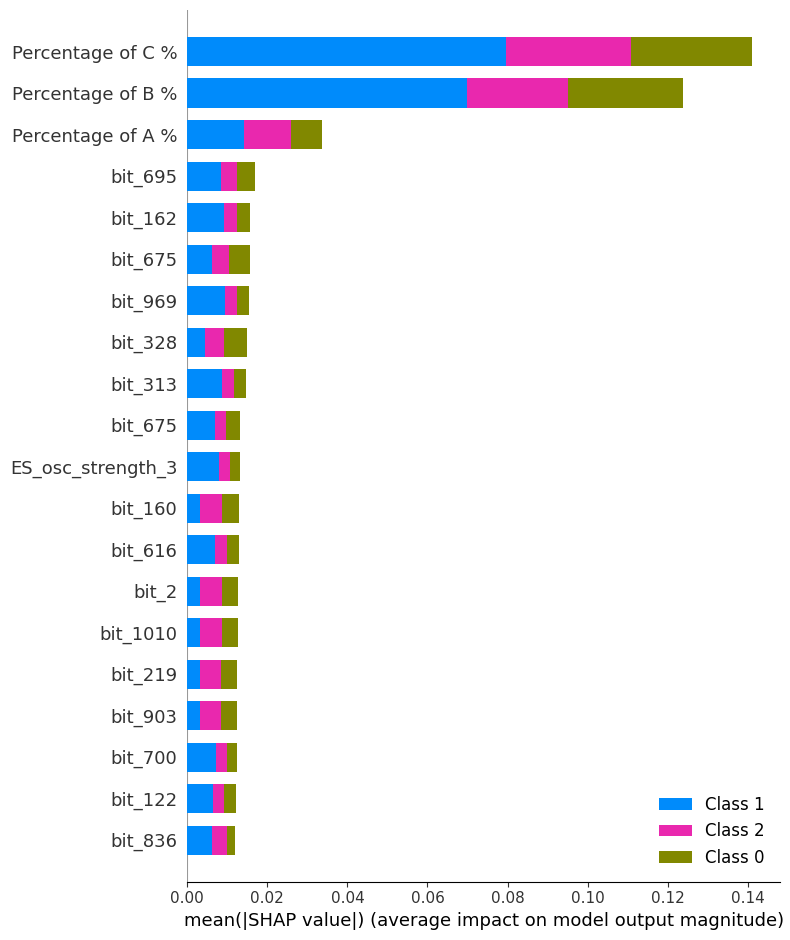

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

#print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values, X_train
                 # features = cols_X, max_display=30,
                  # pd.DataFrame(np_test_data.reshape((20, -1)), columns=dataset.columns.values),
                  #np_test_data.reshape((20, -1)),
                  )


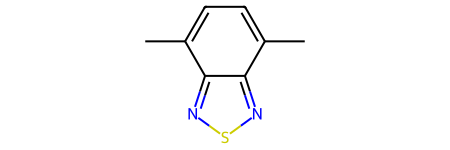

In [ ]:
epinephrine = Chem.MolFromSmiles('Cc1ccc(C)c2nsnc12') #('*c1sc(*)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12')
epinephrine

In [ ]:

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=3,nBits=1024, bitInfo=bi)
#fp = rdFingerprintGenerator.GetMorganGenerator(epinephrine,radius=3,fpSize=1024,countSimulation=True, bitInfo=bi)
# show 10 of the set bits:
list(fp.GetOnBits())[:]

[33,
 122,
 142,
 210,
 328,
 346,
 356,
 367,
 378,
 475,
 613,
 616,
 661,
 667,
 675,
 684,
 698,
 700,
 726,
 849,
 1005]

In [ ]:
fpgen1 = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=1024,countSimulation=True)
fp = fpgen1.GetCountFingerprintAsNumPy(epinephrine, bitInfo=bi)

ArgumentError: ignored

In [ ]:
from IPython.display import SVG

def LoveYouNakiusMou(mol, bits, bit_info):
  atomsToUse = set()
  for bit in bits:
    for (atom_id, _) in bit_info[bit]:
      atomsToUse.add(atom_id)
  atomsToUse = list(atomsToUse)
  print(atomsToUse)
  d = Draw.rdMolDraw2D.MolDraw2DSVG(600, 600)
  Draw.rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=atomsToUse)
  return d

[0, 1, 4, 5, 7, 9]


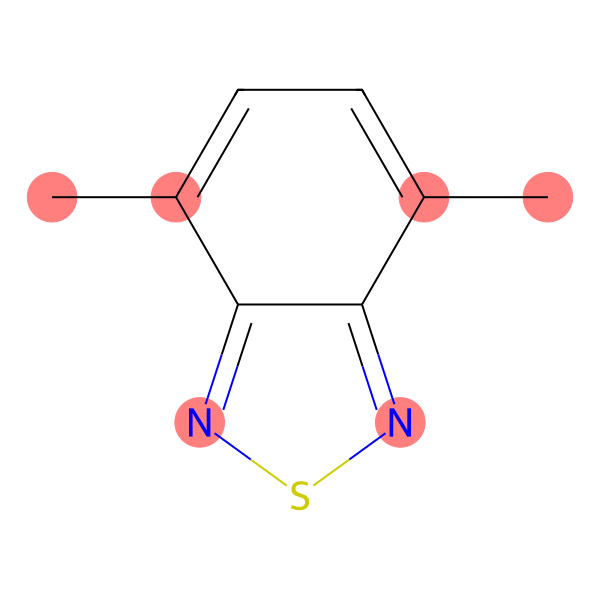

In [ ]:
mol = Chem.MolFromSmiles('Cc1ccc(C)c2nsnc12')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024, useChirality=True,bitInfo=bi)
d =LoveYouNakiusMou(mol, [ 210, 328, 33, 122], bi) #656, 981,
d.FinishDrawing()
SVG(d.GetDrawingText().replace('svg:', ''))

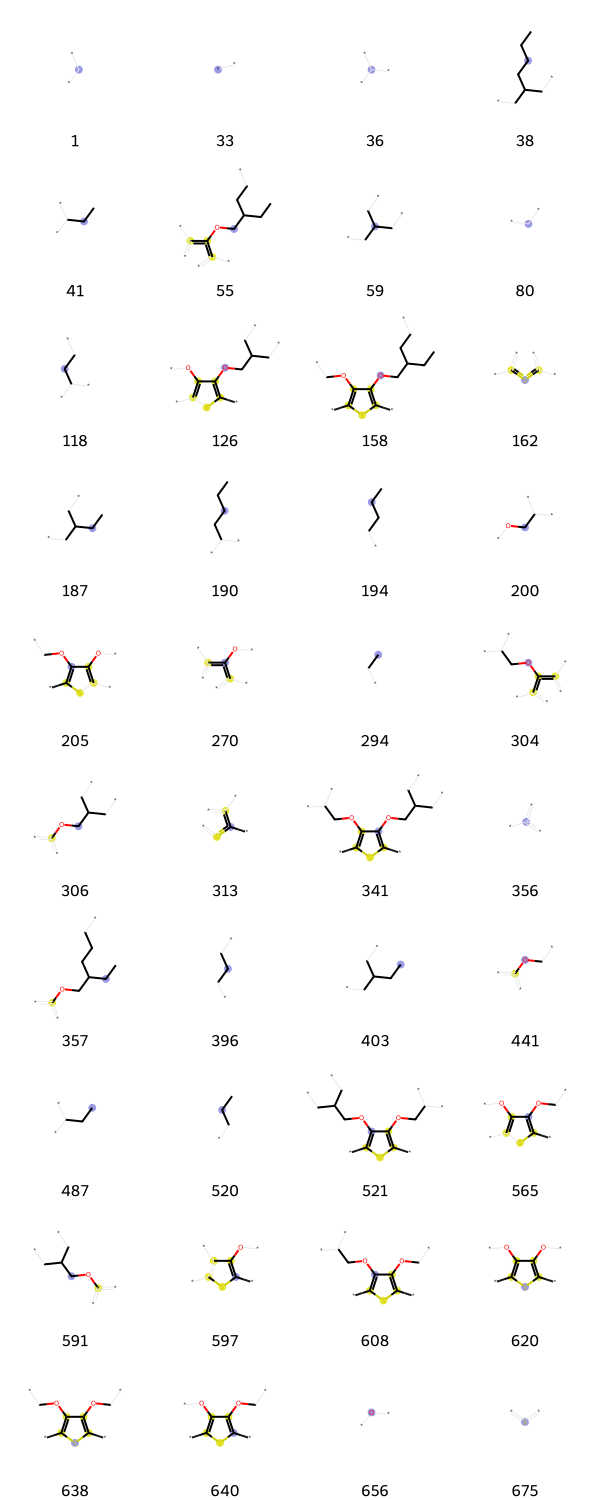

In [ ]:
epinephrine = Chem.MolFromSmiles('*c1sc(*)c(OCC(CC)CCCC)c1OCC(CC)CCCC')

bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024, bitInfo=bi)
tpls = [(epinephrine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:40],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:40])

#Eval

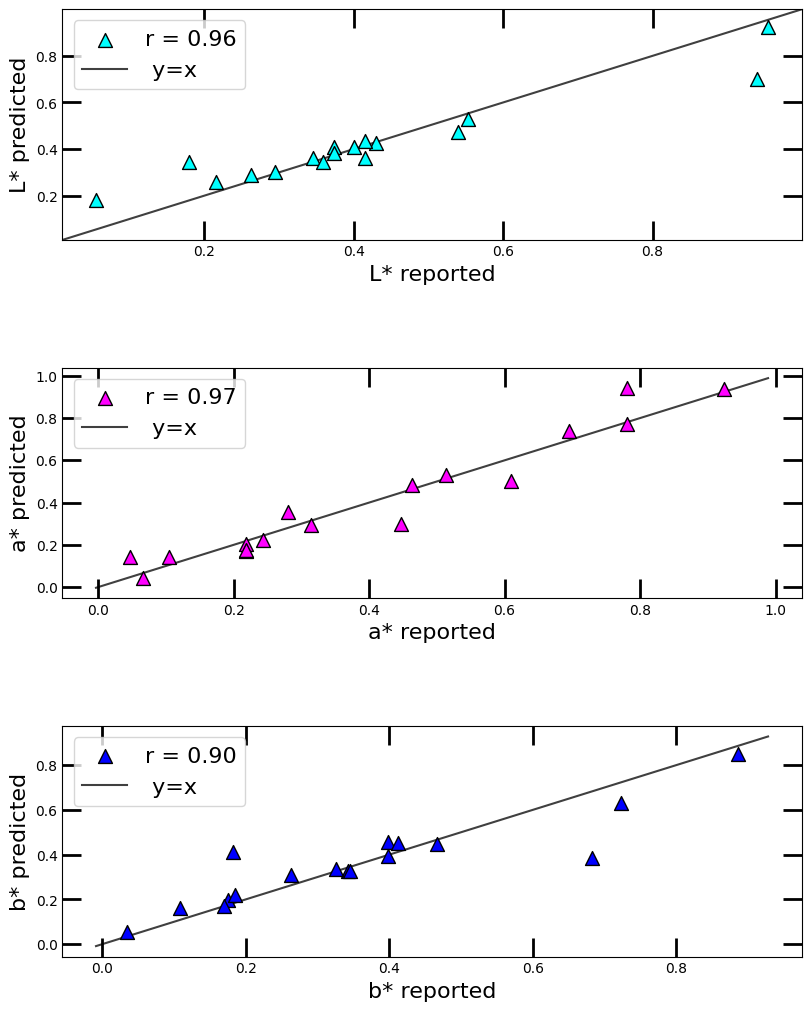

In [ ]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
fig, axes = plt.subplots(figsize=(8,10),nrows=3, ncols=1,constrained_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.25})

ax0, ax1, ax2= axes.flatten()

# Polymer Chemistry, 11, 2173 – 2181, 2020 journal
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test[:,0],y_pred[:,0])
ax0.scatter(y_test[:,0],y_pred[:,0],color="cyan", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))


line = slope*np.array(y_test[:,0])+intercept
#ax0.plot(y_true[:,0], line, '-', linewidth=2.0, alpha=0.6,color='cyan', label='y={:.2f}x+{:.2f}'.format(slope,intercept))


lims = [
    np.min([ax0.get_xlim(), ax0.get_ylim()]),  # min of both axes
    np.max([ax0.get_xlim(), ax0.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax0.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
#ax0.set_aspect('equal')
ax0.set_xlim(lims)
ax0.set_ylim(lims)
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.tick_params(axis = 'both', which='both', width=2)
ax0.tick_params(axis='x', colors='black')
ax0.tick_params(axis = 'both', which='major', length=14)
ax0.tick_params(axis = 'both', which='minor', length=8, color='black')
ax0.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax0.set_xlabel('L* reported', fontsize=16)
ax0.set_ylabel('L* predicted', fontsize=16)
ax0.legend(prop={'size': 16})


slope, intercept, r_value, p_value, std_err = stats.linregress(y_test[:,1],y_pred[:,1])
ax1.scatter(y_test[:,1],y_pred[:,1], color="magenta", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))
line = slope*np.array(y_test[:,1])+intercept
#ax1.plot(y_true[:,1], line, '-', linewidth=2.0, alpha=0.6, color='magenta' ,label='y={:.2f}x+{:.2f}'.format(slope,intercept))
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax1.set_xlabel('a* reported', fontsize=16)
ax1.set_ylabel('a* predicted', fontsize=16)
ax1.legend(prop={'size': 16})


slope, intercept, r_value, p_value, std_err = stats.linregress(y_test[:,2],y_pred[:,2])
ax2.scatter(y_test[:,2],y_pred[:,2], color="blue", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))
line = slope*np.array(y_test[:,2])+intercept
#ax2.plot(y_true[:,2], line, '-', linewidth=2.0, alpha=0.6, label='y={:.2f}x+{:.2f}'.format(slope,intercept))

lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis = 'both', which='both', width=2)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis = 'both', which='major', length=14)
ax2.tick_params(axis = 'both', which='minor', length=8, color='black')
ax2.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax2.set_xlabel('b* reported', fontsize=16)
ax2.set_ylabel('b* predicted', fontsize=16)
ax2.legend(prop={'size': 16})


#plt.savefig('/content/set_transformer_test.png', rasterized=True,  bbox_inches="tight", dpi=600)

In [ ]:
dataset_test

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,ES_osc_strength_2,ES_osc_strength_3,ES_osc_strength_4,ES_osc_strength_5,ES_osc_strength_6,ES_osc_strength_7,ES_osc_strength_8,ES_osc_strength_9,ES_osc_strength_10,Percentage of C %
0,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled, dtype=np.float16)

# y_pred, y_std= model.test_model(validation_data_1, validation_data_2, validation_data_3 ,y_valid) #, y_std
y_pred, y_std= test(_model, validation_data_1, validation_data_2, validation_data_3 ,y_valid) #, y_std

y_pred = y_pred#.cpu().detach().numpy()
#y_pred=[item for sublist in y_pred for item in sublist]
y_true= y_valid # experimental_y_scaled

y_true= scalery.inverse_transform(y_true)
y_pred= scalery.inverse_transform(y_pred)#.detach().numpy())

u= ((y_true - y_pred)** 2).sum()
v = ((y_true - y_true.mean()) ** 2).sum()
R= 1-(u/v)
print(R)
r2_score(y_true, y_pred)#, multioutput='variance_weighted')

1.0


-2.389716960861419

In [ ]:
r2_score(y_true[:,0],y_pred[:,0])

-4.63578601404349

In [ ]:
r2_score(y_true[:,1],y_pred[:,1])

-0.8556944859174813

In [ ]:
r2_score(y_true[:,2],y_pred[:,2])

-1.6776703826232846

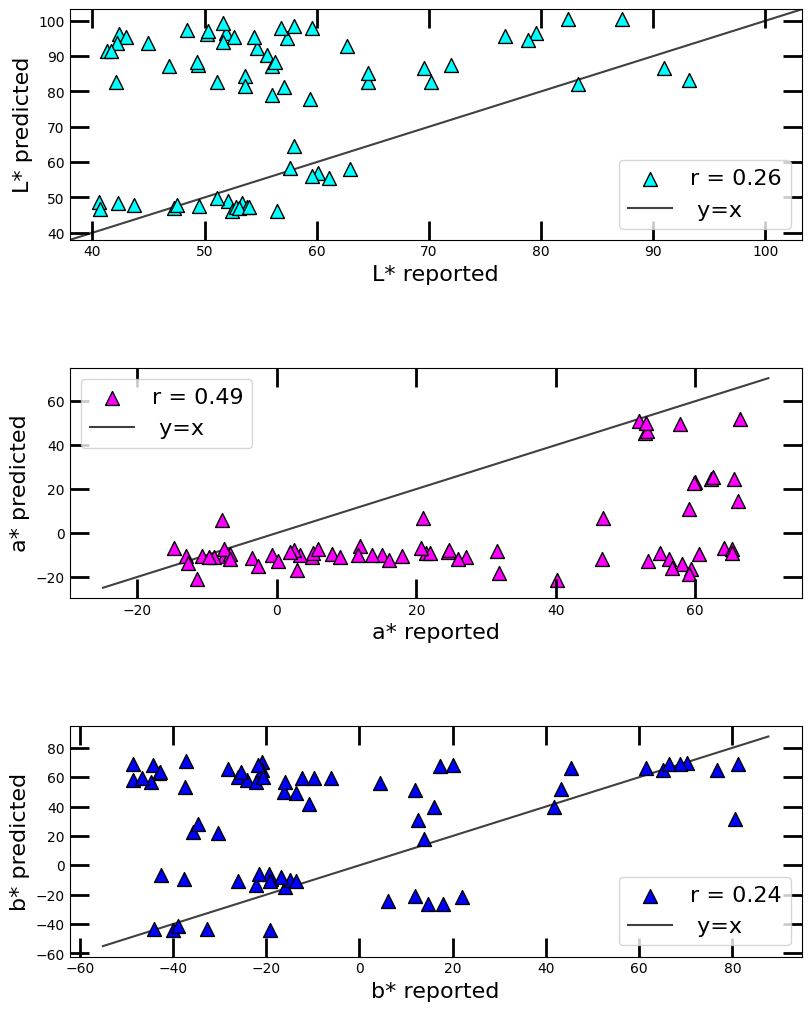

In [ ]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
fig, axes = plt.subplots(figsize=(8,10),nrows=3, ncols=1,constrained_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.25})

ax0, ax1, ax2= axes.flatten()

# Polymer Chemistry, 11, 2173 – 2181, 2020 journal

slope, intercept, r_value, p_value, std_err = stats.linregress(y_true[:,0],y_pred[:,0])
ax0.scatter(y_true[:,0],y_pred[:,0],color="cyan", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))

lims = [
    np.min([ax0.get_xlim(), ax0.get_ylim()]),  # min of both axes
    np.max([ax0.get_xlim(), ax0.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax0.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
#ax0.set_aspect('equal')
ax0.set_xlim(lims)
ax0.set_ylim(lims)
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.tick_params(axis = 'both', which='both', width=2)
ax0.tick_params(axis='x', colors='black')
ax0.tick_params(axis = 'both', which='major', length=14)
ax0.tick_params(axis = 'both', which='minor', length=8, color='black')
ax0.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax0.set_xlabel('L* reported', fontsize=16)
ax0.set_ylabel('L* predicted', fontsize=16)
ax0.legend(prop={'size': 16})


slope, intercept, r_value, p_value, std_err = stats.linregress(y_true[:,1],y_pred[:,1])
ax1.scatter(y_true[:,1],y_pred[:,1], color="magenta", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))
line = slope*np.array(y_true[:,1])+intercept
#ax1.plot(y_true[:,1], line, '-', linewidth=2.0, alpha=0.6, color='magenta' ,label='y={:.2f}x+{:.2f}'.format(slope,intercept))
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax1.set_xlabel('a* reported', fontsize=16)
ax1.set_ylabel('a* predicted', fontsize=16)
ax1.legend(prop={'size': 16})


slope, intercept, r_value, p_value, std_err = stats.linregress(y_true[:,2],y_pred[:,2])
ax2.scatter(y_true[:,2],y_pred[:,2], color="blue", s=100, edgecolor='black', marker='^', label='r = {:.2f}'.format(r_value))
line = slope*np.array(y_true[:,2])+intercept
#ax2.plot(y_true[:,2], line, '-', linewidth=2.0, alpha=0.6, label='y={:.2f}x+{:.2f}'.format(slope,intercept))

lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label =' y=x' )
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis = 'both', which='both', width=2)
ax2.tick_params(axis='x', colors='black')

#major_ticks_x = np.arange(-30, 80, 20)
#minor_ticks_x = np.arange(-30, 80, 50)
#major_ticks_y = np.arange(-30, 80, 20)
#minor_ticks_y = np.arange(-30, 80, 5)
#ax2.set_xticks(major_ticks_x)
#ax2.set_xticks(minor_ticks_x, minor=True)
#ax2.set_yticks(major_ticks_y)
#ax2.set_yticks(minor_ticks_y, minor=True)

ax2.tick_params(axis = 'both', which='major', length=14)
ax2.tick_params(axis = 'both', which='minor', length=8, color='black')
ax2.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax2.set_xlabel('b* reported', fontsize=16)
ax2.set_ylabel('b* predicted', fontsize=16)
ax2.legend(prop={'size': 16})

#plt.savefig('/content/set_transformer_valid.png', rasterized=True,  bbox_inches="tight", dpi=600)

In [ ]:
!pip install colormath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
smiles1 = "Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12" #"CC3SC(C2SC(C)C1OCCOC12)C4OCCOC34"
smiles2 = "Cc1ccc(C)c2nc(C)c(C)nc12" # "Cc6nc5c(C1SC(C)C2OCCOC12)ccc(C3SC(C)C4OCCOC34)c5nc6C"#

#"CC7SC(c5ccc(C1SC(C)C2OCCOC12)c6nc(c3ccccc3)c(c4ccccc4)nc56)C8OCCOC78"

#"CC5SC(c3ccc(C1SC(C)C2OCCOC12)c4nsnc34)C6OCCOC56"
# "*C7SC(c5ccc(C1SC(*)C2OCCOC12)c6nc(c3ccccc3)c(c4ccccc4)nc56)C8OCCOC78"

#"*C5SC(c3ccc(C1SC(*)C2OCCOC12)c4nc(C)c(C)nc34)C6OCCOC56" #"Cc1ccc(C)c2nc(C)c(C)nc12"



percentage_1 = np.array([50,55, 60, 65, 70, 75, 80, 85, 90, 95, 100])/100
percentage_2 = (1 - percentage_1)
percentage_3 = (np.zeros(len(percentage_1)))
validation = pd.concat([pd.DataFrame(np.repeat(smiles1, len(percentage_1),axis=0), columns=['smiles1']),pd.DataFrame(np.repeat(smiles2, len(percentage_1),axis=0), columns=['smiles2']),
pd.DataFrame(percentage_3, columns=['smiles3']) ,pd.DataFrame(percentage_1, columns=['percentage_1']), pd.DataFrame(percentage_2, columns=['percentage_2']),
pd.DataFrame(percentage_3, columns=['percentage_3'])], axis=1)


validation_1 =  kat_paws_from_df(validation.smiles1, 'bit_1')
validation_2 =  kat_paws_from_df(validation.smiles2, 'bit_2')
validation_3 =  kat_paws_from_df(validation.smiles3, 'bit_3')
validation_1_dft =  dft_descr_from_df(validation.smiles1)
validation_2_dft =  dft_descr_from_df(validation.smiles2)
validation_3_dft =  dft_descr_from_df(validation.smiles3)
#validation_dataset = pd.concat([validation_1_dft ,validation[['percentage_1']], validation_2_dft ,validation[['percentage_2']], validation_3_dft ,validation[['percentage_3']]], axis=1)

validation_dataset = pd.concat([validation_1,validation_1_dft ,validation[['percentage_1']], validation_2,validation_2_dft ,validation[['percentage_2']], validation_3,validation_3_dft ,validation[['percentage_3']]], axis=1)
#validation_dataset = pd.concat([validation_1,validation[['percentage_1']], validation_2,validation[['percentage_2']], validation_3,validation[['percentage_3']]], axis=1)
validation_dataset

,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,bit_1_7,bit_1_8,bit_1_9,...,ES_osc_strength_2,ES_osc_strength_3,ES_osc_strength_4,ES_osc_strength_5,ES_osc_strength_6,ES_osc_strength_7,ES_osc_strength_8,ES_osc_strength_9,ES_osc_strength_10,percentage_3
0,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = validation_dataset.iloc[:, :Ndims].values, validation_dataset.iloc[:, Ndims:2*Ndims].values, validation_dataset.iloc[:, 2*Ndims:].values, np.zeros(validation_dataset.shape[0])
#validation_data_1, validation_data_2, validation_data_3, y_valid = validation_dataset.iloc[:, :30].values, validation_dataset.iloc[:, 30:60].values, validation_dataset.iloc[:, 60:].values, np.zeros(validation_dataset.shape[0])
#validation_data_1, validation_data_2, validation_data_3, y_valid = validation_dataset.iloc[:, :1352].values, validation_dataset.iloc[:, 1352:4056].values, validation_dataset.iloc[:, 4056:].values, np.zeros(validation_dataset.shape[0])
#validation_data_1, validation_data_2, validation_data_3, y_valid = np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled, dtype=np.float16)

y_pred, y_std= test(_model, validation_data_1, validation_data_2, validation_data_3 ,y_valid) #

y_true= y_valid # experimental_y_scaled

#y_true= scalery.inverse_transform(y_true.reshape(-1, 1))
y_pred= scalery.inverse_transform(y_pred)
y_pred

array([[ 58.819214 ,  46.01241  ,  18.380066 ],
       [ 57.0184   ,  48.468575 ,  16.048882 ],
       [ 56.824368 ,  45.853813 ,  17.596655 ],
       [ 56.360245 ,  48.67437  ,  15.862881 ],
       [ 55.417603 ,  47.271126 ,  11.097125 ],
       [ 55.161655 ,  49.792126 ,  11.391736 ],
       [ 54.95379  ,  49.669075 ,   4.7011404],
       [ 52.574368 ,  49.298336 ,  -3.9099457],
       [ 54.07648  ,  55.882286 , -12.7648535],
       [ 58.56473  ,  57.40597  , -14.671384 ],
       [ 61.087708 ,  57.553303 , -13.097578 ]], dtype=float32)

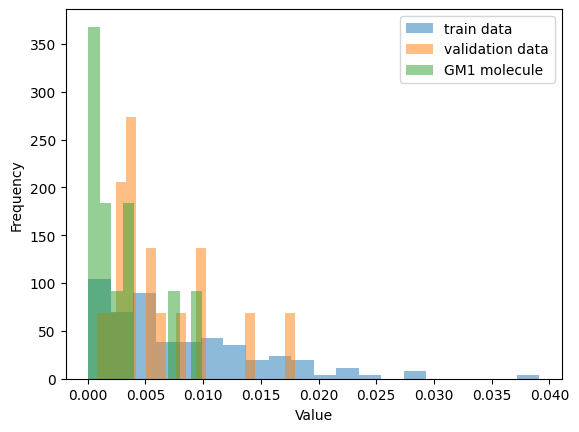

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data1 = train_std
data2 = valid_std
data3 = y_std

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the histograms and normalize
ax.hist(data1, bins=20, alpha=0.5, label='train data', density=True)
ax.hist(data2, bins=20, alpha=0.5, label='validation data', density=True)
ax.hist(data3, bins=10, alpha=0.5, label='GM1 molecule', density=True)

# Add labels and legend
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()

In [ ]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

color_list = []
lab_lists = []
for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)
  c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
  color_list.append(str(c))
  lab_lists.append(lab)

In [ ]:
#validation = experimental.iloc[:, :-10]

In [ ]:
validation['color'] = color_list

In [ ]:
def color_survived(val):
    color = val #else 'red'
    return f'background-color: {color}'

In [ ]:
#validation = pd.read_csv('/content/set_transformer/lab.csv')
validation["L"] = y_pred[:, 0]
validation["a"] = y_pred[:, 1]
validation["b"] = y_pred[:, 2]
styled_df = validation.style.applymap(color_survived, subset=['color'])#.to_excel('styled.xlsx', engine='openpyxl')
styled_df

,smiles1,smiles2,smiles3,percentage_1,percentage_2,percentage_3,color,L,a,b
0,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.500000,0.500000,0.000000,#de6970,58.819214,46.012409,18.380066
1,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.550000,0.450000,0.000000,#db626f,57.018398,48.468575,16.048882
2,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.600000,0.400000,0.000000,#d7646c,56.824368,45.853813,17.596655
3,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.650000,0.350000,0.000000,#d9606e,56.360245,48.674370,15.862881
4,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.700000,0.300000,0.000000,#d36074,55.417603,47.271126,11.097125
5,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.750000,0.250000,0.000000,#d55c73,55.161655,49.792126,11.391736
6,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.800000,0.200000,0.000000,#d25c7d,54.953789,49.669075,4.701140
7,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.850000,0.150000,0.000000,#c75786,52.574368,49.298336,-3.909946
8,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.900000,0.100000,0.000000,#d05499,54.076481,55.882286,-12.764853
9,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,Cc1ccc(C)c2nc(C)c(C)nc12,0.000000,0.950000,0.050000,0.000000,#de5fa8,58.564732,57.405972,-14.671384


In [ ]:
database_smiles = ['C1=CC(=CC=C1C)C',
 'C1COc2cscc2OC1',
 'CC5SC(c3ccc(C1SC(C)C2OCCOC12)c4nsnc34)C6OCCOC56',
 'COc1cc([C])c(OC)cc1[C]',
 'Cc1[se]c(C)c2OCCOc12',
 'Cc1cc2ccc3cc(C)cc4ccc(c1)c2c34',
 'Cc1ccc(C)c2nc(C)c(C)nc12',
 'Cc1ccc(C)c2nsnc12',
 'Cc1ccc(C)s1',
 'Cc1sc(C)c(CCCCCCCC)c1CCCCCCCC',
 'Cc1sc(C)c(OC)c1OC',
 'Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC',
 'Cc1sc(C)c(OCC(CC)CCCCCC)c1OCC(CC)CCCCCC',
 'Cc1sc(C)c(OCCCCCCCC)c1OCCCCCCCC',
 'Cc1sc(C)c2OC(C)CC(C)Oc12',
 'Cc1sc(C)c2OCC(C)(C)COc12',
 'Cc1sc(C)c2OCC(CC(C)C)(CC(C)C)COc12',
 'Cc1sc(C)c2OCC(CC)(CC)COc12',
 'Cc1sc(C)c2OCC(CCC(=O)OCCCCCCC)(CCC(=O)OCCCCCCC)COc12',
 'Cc1sc(C)c2OCC(CCOCC(CC)CCCC)(CCOCC(CC)CCCCC)COc12',
 'Cc1sc(C)c2OCC(CCOCCCCCCCC)(CCOCCCCCCCC)COc12',
 'Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12',
 'Cc1sc(C)c2OCC(COCC(CCCC)CCCCCCCCC)(COCC(CCCCCC)CCCCCCCCC)COc12',
 'Cc1sc(C)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12',
 'Cc1sc(C)c2OCCCOc12',
 'Cc1sc(C)c2OCCOc12',
 'Cc1sc(C)c2O[C@H](C)CC(C)Oc12',
 'Cc3ccc2c1ccc(C)cc1C(CCCCCCCC)(CCCCCCCC)c2c3',
 'Cc3ccc2c1ccc(C)cc1n(CCCCCCCC)c2c3',
 'Cc4ccc(c2ccc(c1ccc(C)s1)c3nsnc23)s4',
 'Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56']

In [ ]:
database_smiles = zinc_smiles  #np.concatenate([zinc20_smiles , database_smiles])

NameError: ignored

In [ ]:
smiles1 = "Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12" #"CC3SC(C2SC(C)C1OCCOC12)C4OCCOC34"
#smiles1 = "Cc1ccc(C)c2nc(C)c(C)nc12" #"Cc6nc5c(C1SC(C)C2OCCOC12)ccc(C3SC(C)C4OCCOC34)c5nc6C"#

def create_predictions_dataset(smiles2):
    percentage_1 = np.array([50,55, 60, 65, 70, 75, 80, 85, 90, 95, 100])/100
    percentage_2 = (1 - percentage_1)
    percentage_3 = (np.zeros(len(percentage_1)))
    validation = pd.concat([pd.DataFrame(np.repeat(smiles1, len(percentage_1),axis=0), columns=['smiles1']),pd.DataFrame(np.repeat(smiles2, len(percentage_1),axis=0), columns=['smiles2']),
    pd.DataFrame(percentage_3, columns=['smiles3']) ,pd.DataFrame(percentage_1, columns=['percentage_1']), pd.DataFrame(percentage_2, columns=['percentage_2']),
    pd.DataFrame(percentage_3, columns=['percentage_3'])], axis=1)


    validation_1 =  kat_paws_from_df(validation.smiles1, 'bit_1')
    validation_2 =  kat_paws_from_df(validation.smiles2, 'bit_2')
    validation_3 =  kat_paws_from_df(validation.smiles3, 'bit_3')
    validation_1_dft =  dft_descr_from_df(validation.smiles1)
    validation_2_dft =  dft_descr_from_df(validation.smiles2)
    validation_3_dft =  dft_descr_from_df(validation.smiles3)
    #validation_dataset = pd.concat([validation_1_dft ,validation[['percentage_1']],validation_2_dft ,validation[['percentage_2']], validation_3_dft ,validation[['percentage_3']]], axis=1)
    #validation_dataset = pd.concat([validation.smiles2, validation_1,validation[['percentage_1']], validation_2,validation[['percentage_2']], validation_3,validation[['percentage_3']]], axis=1)
    validation_dataset = pd.concat([validation.smiles2,validation_1,validation_1_dft ,validation[['percentage_1']], validation_2,validation_2_dft ,validation[['percentage_2']], validation_3,validation_3_dft ,validation[['percentage_3']]], axis=1)

    return validation_dataset


In [ ]:
data_all=[]
smiles2=[]
for smiles in database_smiles:

  data_all.append(create_predictions_dataset(smiles))

In [ ]:
combined_df = pd.concat(data_all, axis=0)
combined_df#.to_csv('')

,smiles2,bit_1_0,bit_1_1,bit_1_2,bit_1_3,bit_1_4,bit_1_5,bit_1_6,bit_1_7,bit_1_8,...,ES_osc_strength_2,ES_osc_strength_3,ES_osc_strength_4,ES_osc_strength_5,ES_osc_strength_6,ES_osc_strength_7,ES_osc_strength_8,ES_osc_strength_9,ES_osc_strength_10,percentage_3
0,C1=CC(=CC=C1C)C,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1=CC(=CC=C1C)C,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1=CC(=CC=C1C)C,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1=CC(=CC=C1C)C,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1=CC(=CC=C1C)C,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
validation_data_1, validation_data_2, validation_data_3, y_valid = combined_df.iloc[:, 1:Ndims+1].values, combined_df.iloc[:, Ndims+1:2*Ndims+1].values, combined_df.iloc[:, 2*Ndims+1:].values, np.zeros(combined_df.shape[0])

y_pred= test(_model, validation_data_1, validation_data_2, validation_data_3 ,y_valid) #, y_std
y_pred = y_pred#.cpu().detach().numpy()
#y_pred=[item for sublist in y_pred for item in sublist]
#y_true= y_valid # experimental_y_scaled

#y_true= scalery.inverse_transform(y_true)
y_pred= scalery.inverse_transform(y_pred[0])#.detach().numpy())
y_pred

array([[ 81.638306  ,  -0.5904029 ,  78.06594   ],
       [ 81.94838   ,   8.878035  ,  74.865005  ],
       [ 77.77234   ,  23.373016  ,  62.74202   ],
       ...,
       [ 60.290573  , -31.03682   ,  -0.61325   ],
       [ 60.39517   , -28.310648  ,  -0.9181471 ],
       [ 60.628757  , -30.013466  ,  -0.55796134]], dtype=float32)

In [ ]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

color_list = []
for i in range(len(y_pred)):
  lab_list = (list(y_pred[i]))
  a = ', '.join(str(item) for item in list(y_pred[i]))
  lab = LabColor(lab_l = lab_list[0], lab_a = lab_list[1], lab_b = lab_list[2], observer='2', illuminant='d65')
  xyz = convert_color(lab, sRGBColor)
  c=Color(rgb=(xyz.clamped_rgb_r, xyz.clamped_rgb_g, xyz.clamped_rgb_b))
  color_list.append(str(c))

In [ ]:
combined_df['color'] = color_list
combined_df["L"] = y_pred[:, 0]
combined_df["a"] = y_pred[:, 1]
combined_df["b"] = y_pred[:, 2]

In [ ]:
df = combined_df.iloc[:,3172:3173]#.style.applymap(color_survived, subset=['color'])#.to_excel('styled.xlsx', engine='openpyxl')
df

,b
0,78.065941
1,74.865005
2,62.742020
3,53.724342
4,37.729553
...,...
6,-1.349743
7,-0.442854
8,-0.613250
9,-0.918147


In [ ]:
styled_df =df.style.applymap(color_survived, subset=['color'])#.to_excel('styled.xlsx', engine='openpyxl')
styled_df

KeyError: ignored

In [ ]:
combined_df.to_csv('dft+fingerprint.csv') #['smiles1'] = zinc20_smiles

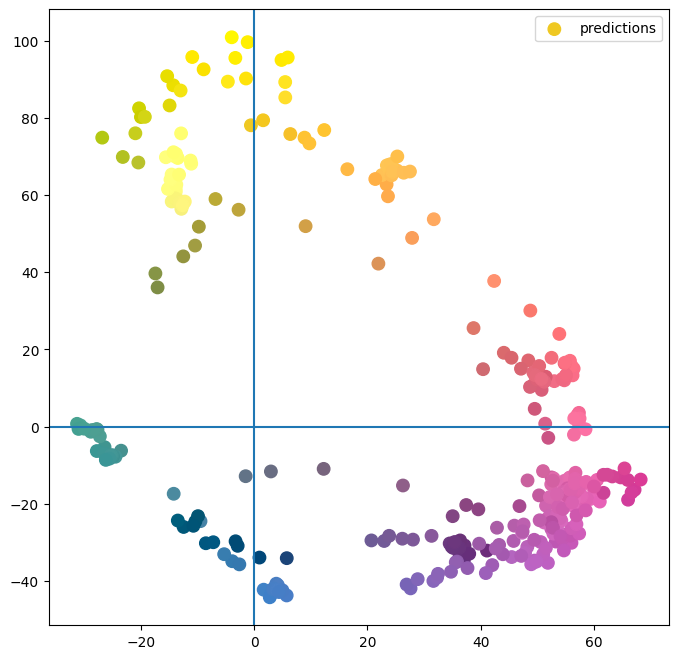

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x=0)
ax.axhline(y=0)
ax.scatter(combined_df.a , combined_df.b , c=combined_df.color, s=80, label='predictions')
#ax.scatter(exp_batches['a'],exp_batches['b'], c=color_list_exp, marker='^', edgecolors='black', s=80, label='experimental batches')
#ax.scatter(gen_data['a'], gen_data['b'], c=color_list_gen, marker='s', edgecolors='black', s=80, label='generative model')
plt.legend()

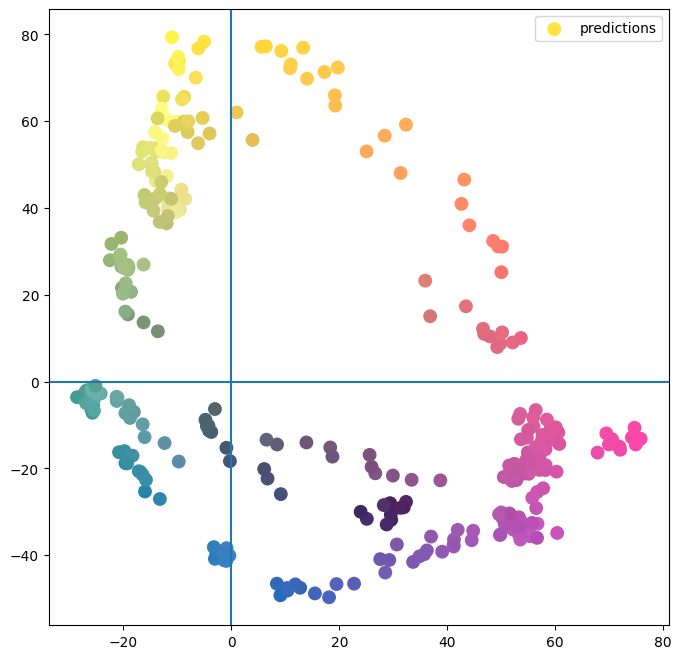

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.axvline(x=0)
ax.axhline(y=0)
ax.scatter(combined_df.a , combined_df.b , c=combined_df.color, s=80, label='predictions')
#ax.scatter(exp_batches['a'],exp_batches['b'], c=color_list_exp, marker='^', edgecolors='black', s=80, label='experimental batches')
#ax.scatter(gen_data['a'], gen_data['b'], c=color_list_gen, marker='s', edgecolors='black', s=80, label='generative model')
plt.legend()

In [ ]:
zinc=pd.read_csv('/content/zinc20_suggestions.csv')
zinc.smiles_B.values
zinc_smiles = zinc.smiles_B.str.replace('*', 'C').values
zinc_smiles

In [ ]:
zinc20_smiles = zinc.smiles_B.values

In [ ]:
!pip install molplotly

In [ ]:
import pandas as pd
import plotly.express as px

import molplotly

# load a DataFrame with smiles

# generate a scatter plot
fig = px.scatter(combined_df, x="a", y="b")

# add molecules to the plotly graph - returns a Dash app
app = molplotly.add_molecules(fig=fig,
                            df=combined_df,
                            smiles_col='smiles1',
                            #title_col='Compound ID',
                           # hover_data=['smiles1']#, 'percentage_1', 'percentage_2']
                            )

# run Dash app inline in notebook (or in an external server)
app.run_server(mode='inline', port=8700, height=1000)

Dash is running on http://127.0.0.1:8700/



INFO:dash.dash:Dash is running on http://127.0.0.1:8700/



<IPython.core.display.Javascript object>